# <a id='toc1_'></a>[Solar Power Prediction - Supervised Learning Project](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Solar Power Prediction - Supervised Learning Project](#toc1_)    
  - [Project Topic](#toc1_1_)    
  - [Data](#toc1_2_)    
  - [Data Cleaning/Exploratory Data Analysis](#toc1_3_)    
        - [Summary of future cleaning and EDA steps](#toc1_3_1_1_1_)    
    - [Importing libraries and defining functions](#toc1_3_2_)    
    - [Importing data and defining data types](#toc1_3_3_)    
      - [Determining data quality issues](#toc1_3_3_1_)    
        - [Correcting plant 1's dc_power scale issue](#toc1_3_3_1_1_)    
        - [Merge dataframes](#toc1_3_3_1_2_)    
  - [Exploratory Data Analysis](#toc1_4_)    
        - [Determine and understand feature dependencies](#toc1_4_1_1_1_)    
        - [Feature Engineering to Remove the Outliers](#toc1_4_1_1_2_)    
        - [Feature Engineering x_time_stamp](#toc1_4_1_1_3_)    
        - [Collinearity Analysis with Variance Inflation Factor](#toc1_4_1_1_4_)    
        - [EDA Summary](#toc1_4_1_1_5_)    
  - [Model Generation](#toc1_5_)    
    - [Linear Regression and Polynomial Regression](#toc1_5_1_)    
      - [Forward Selection of Features without Outliers](#toc1_5_1_1_)    
          - [Results](#toc1_5_1_1_1_1_)    
      - [Forward Selection of Features with Outliers](#toc1_5_1_2_)    
          - [Results](#toc1_5_1_2_1_1_)    
      - [Polynomial Features/Polynomial Regression](#toc1_5_1_3_)    
          - [Results](#toc1_5_1_3_1_1_)    
      - [Linear Regression and Polynomial Regression Summary](#toc1_5_1_4_)    
    - [Random Forest Regression](#toc1_5_2_)    
      - [HyperParameter Tuning](#toc1_5_2_1_)    
          - [Results](#toc1_5_2_1_1_1_)    
    - [adaBoost Regression](#toc1_5_3_)    
      - [Hyper parameter tuning for the adaBoost Model](#toc1_5_3_1_)    
          - [Results](#toc1_5_3_1_1_1_)    
    - [Gradient Boosting Regression](#toc1_5_4_)    
      - [Hyper parameter tuning for the Gradient Boost Model](#toc1_5_4_1_)    
          - [Results](#toc1_5_4_1_1_1_)    
  - [Results and Analysis](#toc1_6_)    
    - [R^2 Scores for the different models](#toc1_6_1_)    
          - [Tie Breaker for Random Forest and Gradient Boost](#toc1_6_1_1_1_1_)    
  - [Discussion and Conclusion](#toc1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Project Topic](#toc0_)

The purpose of this project is to predict the DC power generation with the data collected from two different power plants. This is a supervised learning regression task. Having this model/information will allow the user to predict the solar power generation based on expected weather data and to identify hardware issues quickly.

It is critical to predict future power generation of renewables because our grid is comprised of many different generation sources, and some of those sources are difficult startup and shutdown, including nuclear, oil, and gas plants. Understanding the future power generation of renewables will allow the time required to startup other plants to overcome any energy deficit.

The data that I have also includes information about the specific inverters associated with a bank of solar panels. Having this information will allow the user to identify when different hardware isn't performing up to specification. This will give them the opportunity to fix the hardware in a timely manner.

To make these predictions, I will use various supervised learning techniques, including linear regression, polynomial regression with feature engineering, and decision trees. I will compare the models and determine a recommended model for the user.

## <a id='toc1_2_'></a>[Data](#toc0_)

I am using a tabulated dataset from two different solar generation plants from Kaggle[^1]. Associated with each plant is a second dataset that has relevant weather data from May 15th 2020 to June 15th 2020.

Plant 1 has 68777 rows and 7 columns. Plant 2 has 67698 rows and 7 columns. The columns are:
- date_time: The date and time of the observation in 15 minutes intervals
- plant_id: The ID of the plant where the solar panels are located
- source_key: The serial number of the inverter (22 unique inverters for each plant)
- dc_power: The DC power generated by the solar panels (kW)
- ac_power: The AC power generated by the inverter (kW)
- daily_yield: The cumulative sum of the AC power generated by the inverter (kWh) from the start of the day
- total_yield: The cumulative sum of the AC power generated by the inverter (kWh) from the start of the data collection (May 15, 2020)

Weather 1 has 3181 rows and 6 columns. Weather 2 has 3259 rows and 6 columns. The columns are:
- date_time: The date and time of the observation in 15 minutes intervals
- plant_id: The ID of the plant where the weather station is located
- source_key: The serial number of the weather station (only one per plant)
- ambient_temperature: The ambient temperature (°C)
- module_temperature: The temperature of the weather station (°C)
- irradiation: The amount of solar radiation (kW/m^2)


[^1]: Kannal, A. (2020). Solar Power Generation Data [data file]. Kaggle. https://www.kaggle.com/datasets/anikannal/solar-power-generation-data/download?datasetVersionNumber=1

## <a id='toc1_3_'></a>[Data Cleaning/Exploratory Data Analysis](#toc0_)

##### <a id='toc1_3_1_1_1_'></a>[Summary of future cleaning and EDA steps](#toc0_)

I combined data cleaning and exploratory data analysis because as I was exploring the data, I discovered additional cleaning that needed to be done. Since it doesn't make sense to separate these steps in this case, I will discuss both in this section.

The following steps were performed to clean the data and ensure data integrity for the machine learning models:

1. Importing the data
   1. The data was imported from the csv files into pandas dataframes. There were four csv files that included both plant data and weather data.
2. Set the datatypes
   1. I made sure that the date_time column was a datetime object and source_key was a category. All of the other values were either floats or integers and they imported correctly.
3. Incorrect Scale of Plant 1's dc_power
   1. During my analysis of the statistics of the data from the method .describe(), I noticed that the dc_power generated by plant 1 was 10 times higher than plant 2. After looking into the efficiency rate of the inverters, I determined that it was a decimal issue since the ac_power was the same for both plants. I corrected this by dividing the dc_power by 10 for plant 1.
4. Correlation Matrix
   1. To help understand the data, I created a correlation matrix. 
   2. It showed a strong correlation between the dc_power and the ac_power. This implies that the inverters perform consistently throughout time as the efficiency of the inverter determines the coefficient of the relationship between the dc_power and the ac_power.
   3. The correlation matrix also showed that the dc_power was highly correlated with the irradiation. This makes sense because the solar panels generate power based on the amount of solar radiation that they receive. I will further investigate this relationship in the next step.
5. Removed the outliers of the dc_power to irradiation data
   1. To further understand the correlation that I was seeing in the correlation matrix, I decided to plot the dc_power data to the irradiation data. This showed that there were significant outliers in that ratio. Upon further investigation into the dataset, I found that there were instances of the solar panels being shut down due to overpowering the grid. I decided to remove these instances from the dataset.
6. Transformed x_time_stamp to a polynomial feature
   1. Based on the pairplots, I noticed that the x_time_stamp data wasn't linearly correlated with the dc_power. I decided to transform the x_time_stamp data into a polynomial feature to see if it would improve the model's performance. I ended up using a 6th degree polynomial feature.
7. Statistical Analysis to determine colinear features
   1. I used the variance inflation factor to determine if there were any colinear features. I found that there were significant colinear features. During this analysis, the only features that had a VIF of less than 5 were month, x_time_stamp, and irradiation. Since this analysis would have told me to remove the serial numbers of the inverters, I decided to keep them in the dataset use a forward selection technique to determine the features that were significant in the model.


### <a id='toc1_3_2_'></a>[Importing libraries and defining functions](#toc0_)

In [1]:
##Libraries
import opendatasets as od
import joblib
import os
import json

import math
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,r2_score

from itertools import combinations

model_path = 'models'

##Functions
## Filters out outliers based on the z-score
def filter_outliers(data, column, threshold=3):
    """Removes the outliers of a column in a dataframe based on the z-score set by the threshold.

    Args:
        data (dataframe): Dataframe to be filtered
        column (string): Name of the column to be filtered
        threshold (int, optional): z-score to filter the column on. Defaults to 3.

    Returns:
        dataframe: Filtered dataframe
    """    
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    return data[(z_scores < threshold) & (z_scores > -threshold)]

## Calculate the difference between the current row and the previous row, grouped by the specified column and sorted by another specified column.
def add_diff_column(df, groupby_cols, diff_cols, diff_name):
    """
    This function takes a pandas DataFrame, groups it by one or more columns, 
    sorts it by one or more columns, calculates the difference between the current row and the previous row 
    for one or more columns, and adds the difference as a new column to the original DataFrame.
    
    Parameters:
        df (pd.DataFrame): The original DataFrame.
        groupby_cols (list): The column(s) to group the data by.
        diff_cols (list): The column(s) to calculate the difference for.
        diff_name (str): The name to use for the difference column.
        
    Returns:
        df (pd.DataFrame): The original DataFrame with the added difference column.
    """
    df = df.sort_values(by=groupby_cols+diff_cols)
    grouped = df.groupby(groupby_cols)
    for col in diff_cols:
        df[f'{diff_name}_{col}'] = grouped[col].diff()
    return df

## Plot the data for the analysis of the outlier filter performance.
def plot_concat_df(concatDFbeforeFilter):
    """Plot the data for the analysis of the outlier filter performance. 
    The plots will include a histogram of the ratio of dc_power to irradiation, 
    a relational plot of dc_power and irradiation by plant_id, 
    and a line plot of dc_power and irradiation by inverter_id

    Args:
        concatDFbeforeFilter (pandas dataframe): dataframe that includes the plant performance data and the weather data.
        
    Returns:
        None
    """    
    
    concatDF = concatDFbeforeFilter[(concatDFbeforeFilter['dc_power']>0) & (concatDFbeforeFilter['dc_power_to_irradiation_ratio']<math.inf)]
    
    plt.figure()
    concatDF['dc_power_to_irradiation_ratio'].hist(bins = 50)
    plt.title('Histogram of dc_power_to_irradiation_ratio')
    
    plt.figure()
    sns.relplot(concatDF,row = 'plant_id', y = 'dc_power',x = 'irradiation', hue = 'source_key',alpha = 0.1, legend = False)
    plt.title('Relational plot of dc_power and irradiation by plant_id')

    plt.figure()
    plt.title('Line plot of dc_power and irradiation by inverter')
    sns.lineplot(data = concatDF, x = 'x_time_stamp',y = 'dc_power', hue = 'source_key', alpha = 0.1, legend = False)
    ax2 = plt.gca().twinx()
    sns.lineplot(data = concatDF, x = 'x_time_stamp',y = 'irradiation', ax = ax2, color = 'red')
    plt.title('Line plot of dc_power and irradiation by inverter')
    
    for i in range(concatDF.day.min(),concatDF.day.max()):
        df = concatDF[(concatDF['day'] == i) & (concatDF['plant_id'] == 4135001)]
        plt.figure()
        sns.scatterplot(data = df, x = 'x_time_stamp',y = 'dc_power', hue = 'source_key', alpha = 0.1, legend = False)
        ax2 = plt.gca().twinx()
        sns.lineplot(data = df, x = 'x_time_stamp',y = 'irradiation', ax = ax2, color = 'red')
        plt.title(f'Scatter plot of dc_power and irradiation for day {i} and plant 4135001')
        
    plt.show()
    
    for i in range(concatDF.day.min(),concatDF.day.max()):
        df = concatDF[(concatDF['day'] == i) & (concatDF['plant_id'] == 4136001)]
        plt.figure()
        sns.scatterplot(data = df, x = 'x_time_stamp',y = 'dc_power', hue = 'source_key', alpha = 0.1, legend = False)
        ax2 = plt.gca().twinx()
        sns.lineplot(data = df, x = 'x_time_stamp',y = 'irradiation', ax = ax2, color = 'red')
        plt.title(f'Scatter plot of dc_power and irradiation for day {i} and plant 4136001')
        
    plt.show()
    
    
##Linear Regressioon using OLS and Forward Selection
def forward_selection(data, target, significance_level=0.05):
    """Performs a forward selection iteration to find the best features for a linear regression model.

    Args:
        data (dataframe): dataframe of the features to be used in the model
        target (dataframe): dataframe or series of the target variable
        significance_level (float, optional): Minimum P-value of the latest feature being tested. If the p-value of the best feature for the iteration
        is less than this value, the function ends and returns a model without that feature. Defaults to 0.05.

    Returns:
        tuple: (Dictionary of the best features and their p-values, statsmodels OLS model)
    """    


    initial_features = data.columns.tolist()
    remaining_features = list(set(initial_features))
    best_features = []
    return_dict = {}
    while (len(remaining_features) > 1): #Was initial Features... Why? It has worked because I always ran into an insignificant feature to break out of the loop.
        #print(f'Initial Features List {initial_features}')
        remaining_features = list(set(initial_features)-set(best_features))
        #print(f'Remaining Features {remaining_features}')
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        new_adjRsquared = pd.Series(index=remaining_features, dtype='float64')
        model_list = {}
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(
                pd.DataFrame(data[best_features+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
            new_adjRsquared[new_column] = model.rsquared_adj
            model_list[new_column] = model
            
        min_p_value = new_pval.min()
        max_r_squared = new_adjRsquared.max()

        # Add the largest r-squared value to the best features if the p-value is below the threshold
        #print(f'new_adjRsquared: {new_adjRsquared}')
        #print(f'new_pval: {new_pval}')
        if new_pval[new_adjRsquared.idxmax()] < significance_level:
            best_model = model_list[new_adjRsquared.idxmax()]
            best_features.append(new_adjRsquared.idxmax())
            return_dict[new_adjRsquared.idxmax()] = (
                new_pval[new_adjRsquared.idxmax()], new_adjRsquared.max())
        else:
            break

    return (return_dict, best_model)

##Linear Regression using OLS and Best Subset Selection    
def subset_regression_ols(X,y,k):  # sourcery skip: use-fstring-for-concatenation
    '''
    Performs forward selection for the best subset of predictors
    Input:
        df(pandas dataframe): dataframe of the train data, including label
        k(integer): Number in each of the subsets
        label(string): The column name of the labeled column
    Output:
        best_subset(tuple): Set of the best subsets (length = k)
        model(sm.OLS.model): Model of the best subset
        adjustedRSquared(float): Adjusted R Squared value of the best subset
    '''
    predictors_set = set(X.columns)
    label = y.name
    
    best_predictors = ''
    best_adjustedRSquared = 0
    df = pd.concat([X,pd.DataFrame(y)],axis = 1)

    list_of_combinations = combinations(predictors_set,k)
    for predictors in list_of_combinations:
        pred_formula = "+".join(predictors)
        #print(pred_formula)
        #print(predictors)
        
        model = ols(formula=label + "~" + pred_formula, data=df).fit()
        if model.rsquared_adj>best_adjustedRSquared:
            best_predictors = predictors
            best_adjustedRSquared = model.rsquared_adj
            best_model = model
        
    return (best_predictors, best_adjustedRSquared, best_model)

## Fuction to plot the actual vs predicted values and regression line for the model
def plot_actual_vs_predicted(model,X_test,y_test,x_feature):
    """Plot the actual vs predicted values and regression line for the model passed to the function

    Args:
        model (statsmodels.ols): Statsmodels OLS model
        X_test (dataframe): pandas dataframe of the test data including a constant column
        y_test (series): pandas series of the test labels
        x_feature (string): column name of the feature to be used for the x-axis of the regression line and predictor values
    """    
    #Domain Values for the regression line
    x = np.linspace(X_test[x_feature].min(),X_test[x_feature].max(),2)
    
    #Get line based on coefficient for the feature
    y = model.params[x_feature]*x
    
    #Scatter plot of actual vs predicted values
    plt.figure(figsize=(10,6))
    plt.scatter(X_test[x_feature], y_test, color='blue', label='Actual', alpha = 0.1)
    plt.scatter(X_test[x_feature], model.predict(X_test[model.model.exog_names[:]]), color='red', label='Predicted', alpha = 0.025)
    
    #Plot Regression Line
    plt.plot(x,y, color = 'green', label = 'Regression Line')
    plt.title('Actual vs Predicted with the Forward Selection Model')
    plt.xlabel(x_feature)
    plt.ylabel('DC Power')
    plt.legend()
    plt.show()
    
def polynomial_features(X_train, X_test, degree):
    """Returns a dataframe of the polynomial features for the degree passed to the function

    Args:
        X_train (dataframe): dataframe of the train data that needs to be transformed into polynomial features
        X_test (dataframe): dataframe of the test data that needs to be transformed into polynomial features
        degree (integer): degree of the polynomial features

    Returns:
        tuple: dataframes of the transformed train and test data
    """    
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    X_train.poly = pd.DataFrame(X_train_poly)
    X_test.poly = pd.DataFrame(X_test_poly)
    return X_train_poly, X_test_poly



def variance_inflation_factor(df, feature_name, print_summary = False):
    """Variance inflation factor (VIF) for each explanatory variable. Iterates through the list of features and assigns 
    each feature to the exog variable and calculates the VIF for that feature.

    Args:
        feature_name (str): name of the feature for which the VIF should be calculated
        exog (pandas DataFrame): data with each column representing an explanatory variable
        exog_col (str): name of the exog variable in the exog DataFrame for which the VIF should be calculated

    Returns:
        float: VIF for the exog_col variable
    """
    #print(f"Feature Name: {feature_name}")
    x_i = df[feature_name]
    x_noti = df.drop(feature_name, axis=1)
    x_noti.astype('float64')
    model = sm.OLS(x_i, x_noti).fit()
    r_squared_i = model.rsquared
    if print_summary:
        print(model.summary())
    vif = 1. / (1. - r_squared_i)
    return vif

### <a id='toc1_3_3_'></a>[Importing data and defining data types](#toc0_)

In [2]:
plant1 = pd.read_csv('solar-power-generation-data/Plant_1_Generation_Data.csv')
plant2 = pd.read_csv('solar-power-generation-data/Plant_2_Generation_Data.csv')
weather1 = pd.read_csv('solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
weather2 = pd.read_csv('solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')

#Make all column names lowercase and easier to work with
plant1.columns = plant1.columns.str.lower()
plant2.columns = plant2.columns.str.lower()
weather1.columns = weather1.columns.str.lower()
weather2.columns = weather2.columns.str.lower()

#Set Correct Data Types
plant1['date_time'] = pd.to_datetime(plant1['date_time'])
plant2['date_time'] = pd.to_datetime(plant2['date_time'])
weather1['date_time'] = pd.to_datetime(weather1['date_time'])
weather2['date_time'] = pd.to_datetime(weather2['date_time'])
plant1['source_key'] = plant1['source_key'].astype('category')
plant2['source_key'] = plant2['source_key'].astype('category')
weather1['source_key'] = weather1['source_key'].astype('category')
weather2['source_key'] = weather2['source_key'].astype('category')

#### <a id='toc1_3_3_1_'></a>[Determining data quality issues](#toc0_)

I used the below code to determine the number of missing values in each column. I also used the below code to ensure correct data types. 

When I ran the describe method, I noticed that the dc_power for plant 1 was 10 times higher than plant 2. I also noticed that the ac_power was the same for both plants. I determined that this was a decimal issue and corrected it by dividing the dc_power by 10 for plant 1. This will be completed in section "Correcting Plant 1's dc_power scale issue".

In [3]:
#Understanding null values and data types
print(plant1.info())
print(plant2.info())
print(weather1.info())
print(weather2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    68778 non-null  datetime64[ns]
 1   plant_id     68778 non-null  int64         
 2   source_key   68778 non-null  category      
 3   dc_power     68778 non-null  float64       
 4   ac_power     68778 non-null  float64       
 5   daily_yield  68778 non-null  float64       
 6   total_yield  68778 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 3.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    67698 non-null  datetime64[ns]
 1   plant_id     67698 non-null  int64         
 2   source_key   67698 non-null  category      
 3   dc_pow

In [4]:
#Understanding statistics of the data
print(plant1.describe())
print(plant2.describe())
print(weather1.describe())
print(weather2.describe())

        plant_id      dc_power      ac_power   daily_yield   total_yield
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06
        plant_id      dc_power      ac_power   daily_yield   total_yield
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0

##### <a id='toc1_3_3_1_1_'></a>[Correcting plant 1's dc_power scale issue](#toc0_)

Below are histograms to ensure that the distribution of the dc_power for both plants are as expected and there are no further issues after scaling the dc_power for plant 1.

Verify the scales of the DC Power are incorrect for Plant 1


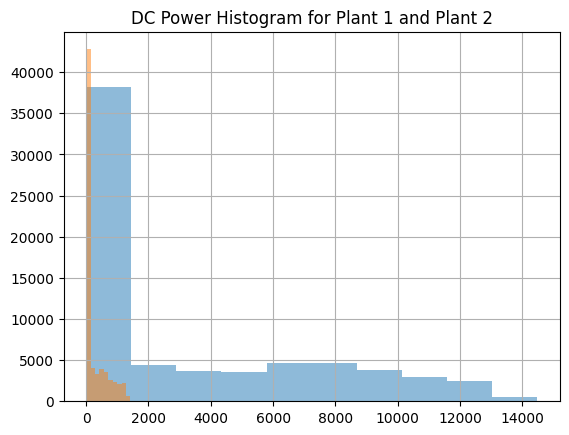

Average DC power for plant 1 before correction: 3147.43
Average DC power for plant 2 before correction: 246.7
Average DC power for plant 1 after correction: 314.74
Average DC power for plant 2 after correction: 246.7
Verify the scales of the DC Power are corrected for Plant 1


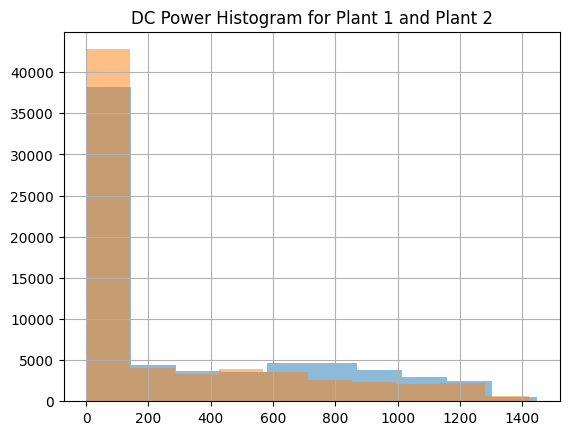

In [5]:
#Histogram of DC Power for both plants to ensure the scales are the same.
print('Verify the scales of the DC Power are incorrect for Plant 1')
plant1['dc_power'].hist(alpha = 0.5, label = 'Plant 1')
plant2['dc_power'].hist(alpha = 0.5, label = 'Plant 2')
plt.title('DC Power Histogram for Plant 1 and Plant 2')
plt.show()

print(f'Average DC power for plant 1 before correction: {plant1.dc_power.mean().round(2)}')
print(f'Average DC power for plant 2 before correction: {plant2.dc_power.mean().round(2)}')

#Decimal Error in Plant 1's dc power
plant1['dc_power'] = plant1['dc_power']/10

print(f'Average DC power for plant 1 after correction: {plant1.dc_power.mean().round(2)}')
print(f'Average DC power for plant 2 after correction: {plant2.dc_power.mean().round(2)}')

print('Verify the scales of the DC Power are corrected for Plant 1')
plant1['dc_power'].hist(alpha = 0.5, label = 'Plant 1')
plant2['dc_power'].hist(alpha = 0.5, label = 'Plant 2')
plt.title('DC Power Histogram for Plant 1 and Plant 2')
plt.show()

##### <a id='toc1_3_3_1_2_'></a>[Merge dataframes](#toc0_)

Since the statistics don't show there are any additional issues between the data sources, I will merge the dataframes and continue the exploratory data analysis on the merged dataframe, including the weather data. The power generation data and the weather data were both sampled at 15 minute intervals. I will match those timestamps to ensure the data is aligned.

In this section, I also created a few calculated columns to help with the EDA portion of the project. I created a column for the month, day, hour, and x_time_stamp of the observation. I also created a column for the dc_power's ratio to the irradiation value. This column will help me remove the outliers from that dataset that was caused by the plant being shutdown due to overpowering the grid. 

In [6]:
#Merge power generation and weather data
plant1Merged = plant1.merge(weather1, on='date_time', how = 'inner')
plant2Merged = plant2.merge(weather2, on='date_time', how = 'inner')

#Remove unnecessary columns
plant1Merged.drop(columns = 'source_key_y', axis = 1, inplace = True) #only one weather station per plant
plant2Merged.drop(columns = 'source_key_y', axis = 1, inplace = True) #only one weather station per plant
plant1Merged.drop(columns = 'plant_id_y', axis = 1, inplace = True) #duplicate
plant2Merged.drop(columns = 'plant_id_y', axis = 1, inplace = True) #duplicate

#Rename columns
plant1Merged.rename(columns = {'plant_id_x':'plant_id','source_key_x':'source_key'}, inplace = True)
plant2Merged.rename(columns = {'plant_id_x':'plant_id','source_key_x':'source_key'}, inplace = True)

#Concatenate the two dataframes
concatDFbeforeFilter = pd.concat([plant1Merged, plant2Merged])
concatDFbeforeFilter.reset_index(drop=True, inplace=True)

#Create new columns for future analysis
concatDFbeforeFilter['day'] = concatDFbeforeFilter['date_time'].dt.day_of_year
concatDFbeforeFilter['month'] = concatDFbeforeFilter['date_time'].dt.month
concatDFbeforeFilter['hour'] = concatDFbeforeFilter['date_time'].dt.hour
concatDFbeforeFilter['minute'] = concatDFbeforeFilter['date_time'].dt.minute/60
concatDFbeforeFilter['x_time_stamp'] = concatDFbeforeFilter['hour']+concatDFbeforeFilter['minute']
concatDFbeforeFilter['dc_power_to_irradiation_ratio'] = concatDFbeforeFilter['dc_power']/concatDFbeforeFilter['irradiation'] #This was added since this feature predicts when the plant was not producing power.

#Get a sample of the data to see what it looks like
concatDFbeforeFilter.sample(5)

date_time  plant_id       source_key     dc_power  \
40912  2020-06-15 17:15:00   4135001  WRmjgnKYAwPKWDb   228.928571   
39170  2020-06-14 21:30:00   4135001  3PZuoBAID5Wc2HD     0.000000   
104279 2020-06-13 16:30:00   4136001  PeE6FRyGXUgsRhN   415.486667   
100086 2020-06-11 16:45:00   4136001  rrq4fwE8jgrTyWY   105.820000   
26517  2020-05-28 12:15:00   4135001  rGa61gmuvPhdLxV  1180.616667   

           ac_power  daily_yield   total_yield  ambient_temperature  \
40912    224.471429  6618.571429  7.261203e+06            26.965932   
39170      0.000000  7504.000000  7.218223e+06            23.862891   
104279   407.293333  6037.533333  1.348529e+09            30.523774   
100086   102.833333  3524.266667  1.211006e+08            25.617999   
26517   1151.616667  4391.166667  7.210940e+06            32.299754   

        module_temperature  irradiation  day  month  hour  minute  \
40912            31.593970     0.156571  167      6    17    0.25   
39170            22.984143     0.000000  166      6    21    0.50   
104279           36.932093     0.270707  165      6    16    0.50   
100086           25.562179     0.068218  163      6    16    0.75   
26517            60.040743     1.063722  149      5    12    0.25   

        x_time_stamp  dc_power_to_irradiation_ratio  
40912          17.25                    1462.138298  
39170          21.50                            NaN  
104279         16.50                    1534.821189  
100086         16.75                    1551.208611  
26517          12.25                    1109.891852

## <a id='toc1_4_'></a>[Exploratory Data Analysis](#toc0_)

##### <a id='toc1_4_1_1_1_'></a>[Determine and understand feature dependencies](#toc0_)

I will use the correlation matrix to determine which features are most correlated with the target variable. I will also use the correlation matrix to determine which features are highly correlated with each other. I will then use the correlation matrix to determine which features are most correlated with each other.

I will use my understanding of the process to remove several columns from the dataframe that are dependent on dc_power. This will include the ac_power, daily_yield, and total_yield columns. I will also remove the hour and minute columns since x_time_stamp is a calculation based off of those two columns. 

In the correlation matrix below, the feature that is most correlated with the dc_power is irradiation. This makes sense because the intent of a solar panel is to convert radiation energy into electrical energy.

To further understand the correlation between the dc_power and irradiation, I will plot the data to see if there are any outliers. Outliers in this data imply that the plant was shut down due to overpowering the grid and should be removed from the analysis. I will compare the data before the outliers were removed to the data after the outliers were removed.

Text(0.5, 1.0, 'Correlation Between the Columns')

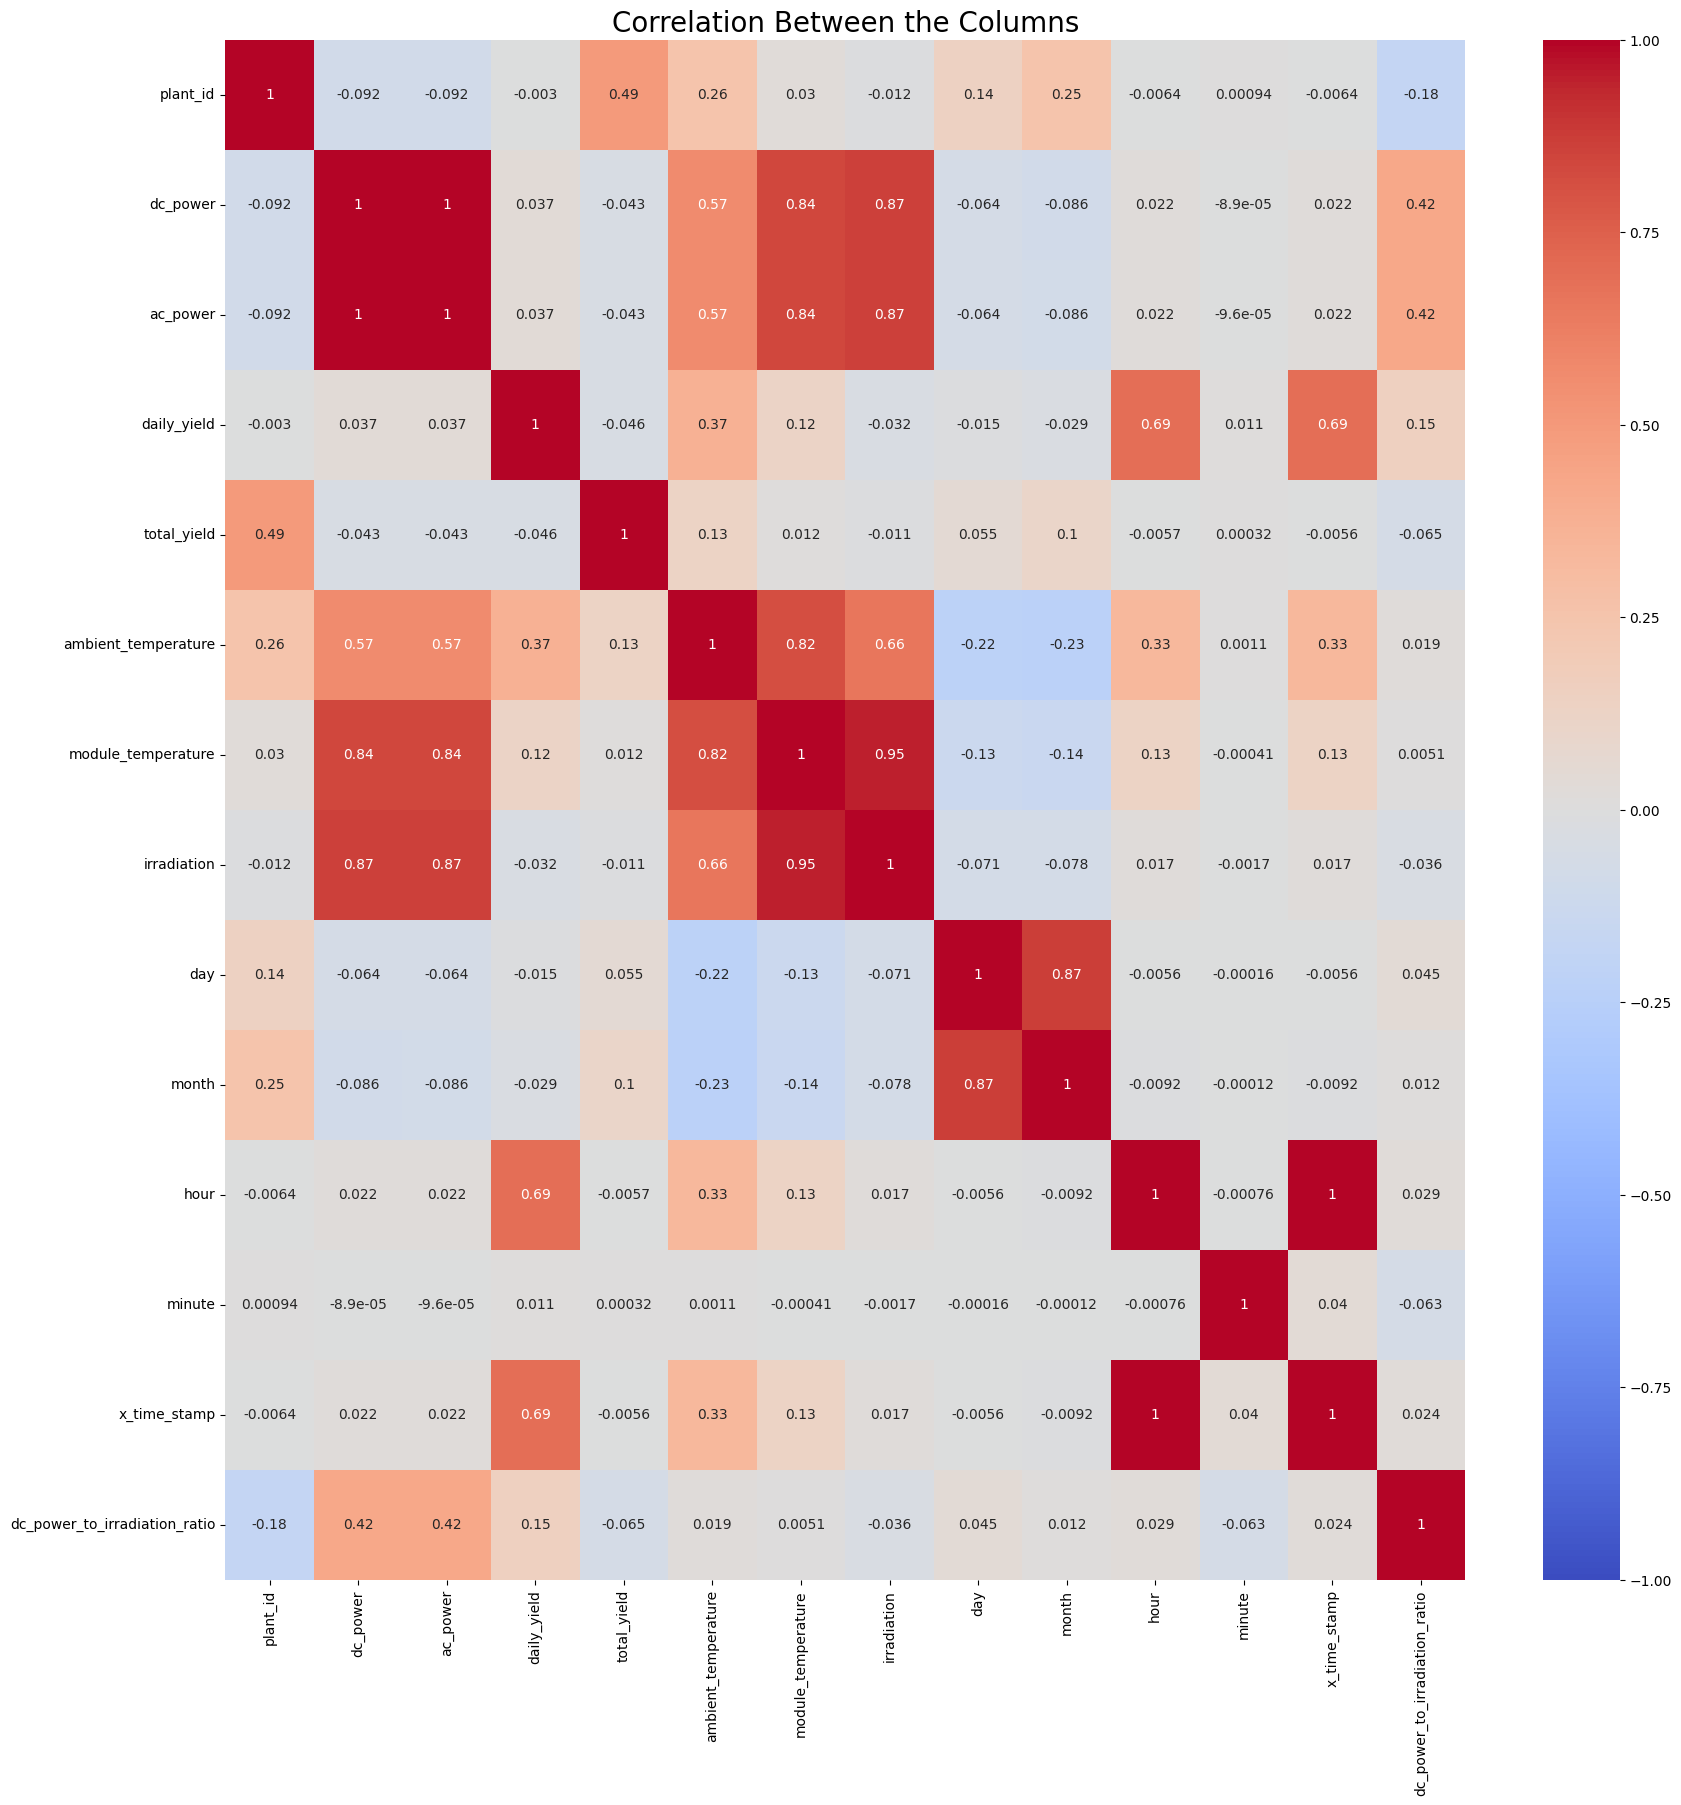

In [7]:
## Create a heatmap of the correlation between the columns
plt.figure(figsize = (20,20))

g = sns.heatmap(concatDFbeforeFilter.corr(numeric_only=True), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
g.set_title('Correlation Between the Columns', fontsize = 20)

Text(0.5, 1.0, 'DC_power vs irradiation')

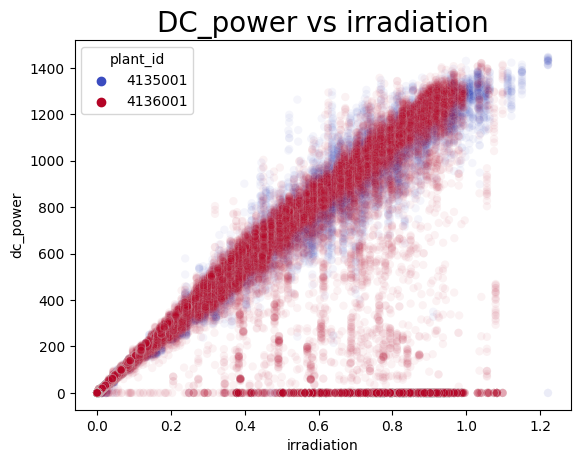

In [8]:
#Scatter plot of DC Power vs Irradiation to determine if there are outliers that should be removed
sns.scatterplot(x = 'irradiation', y = 'dc_power', data = concatDFbeforeFilter, hue = 'plant_id', alpha = 0.05, palette = 'coolwarm')
plt.title('DC_power vs irradiation', fontsize = 20)

Text(0.5, 0.98, 'Pair Plot of the Columns')

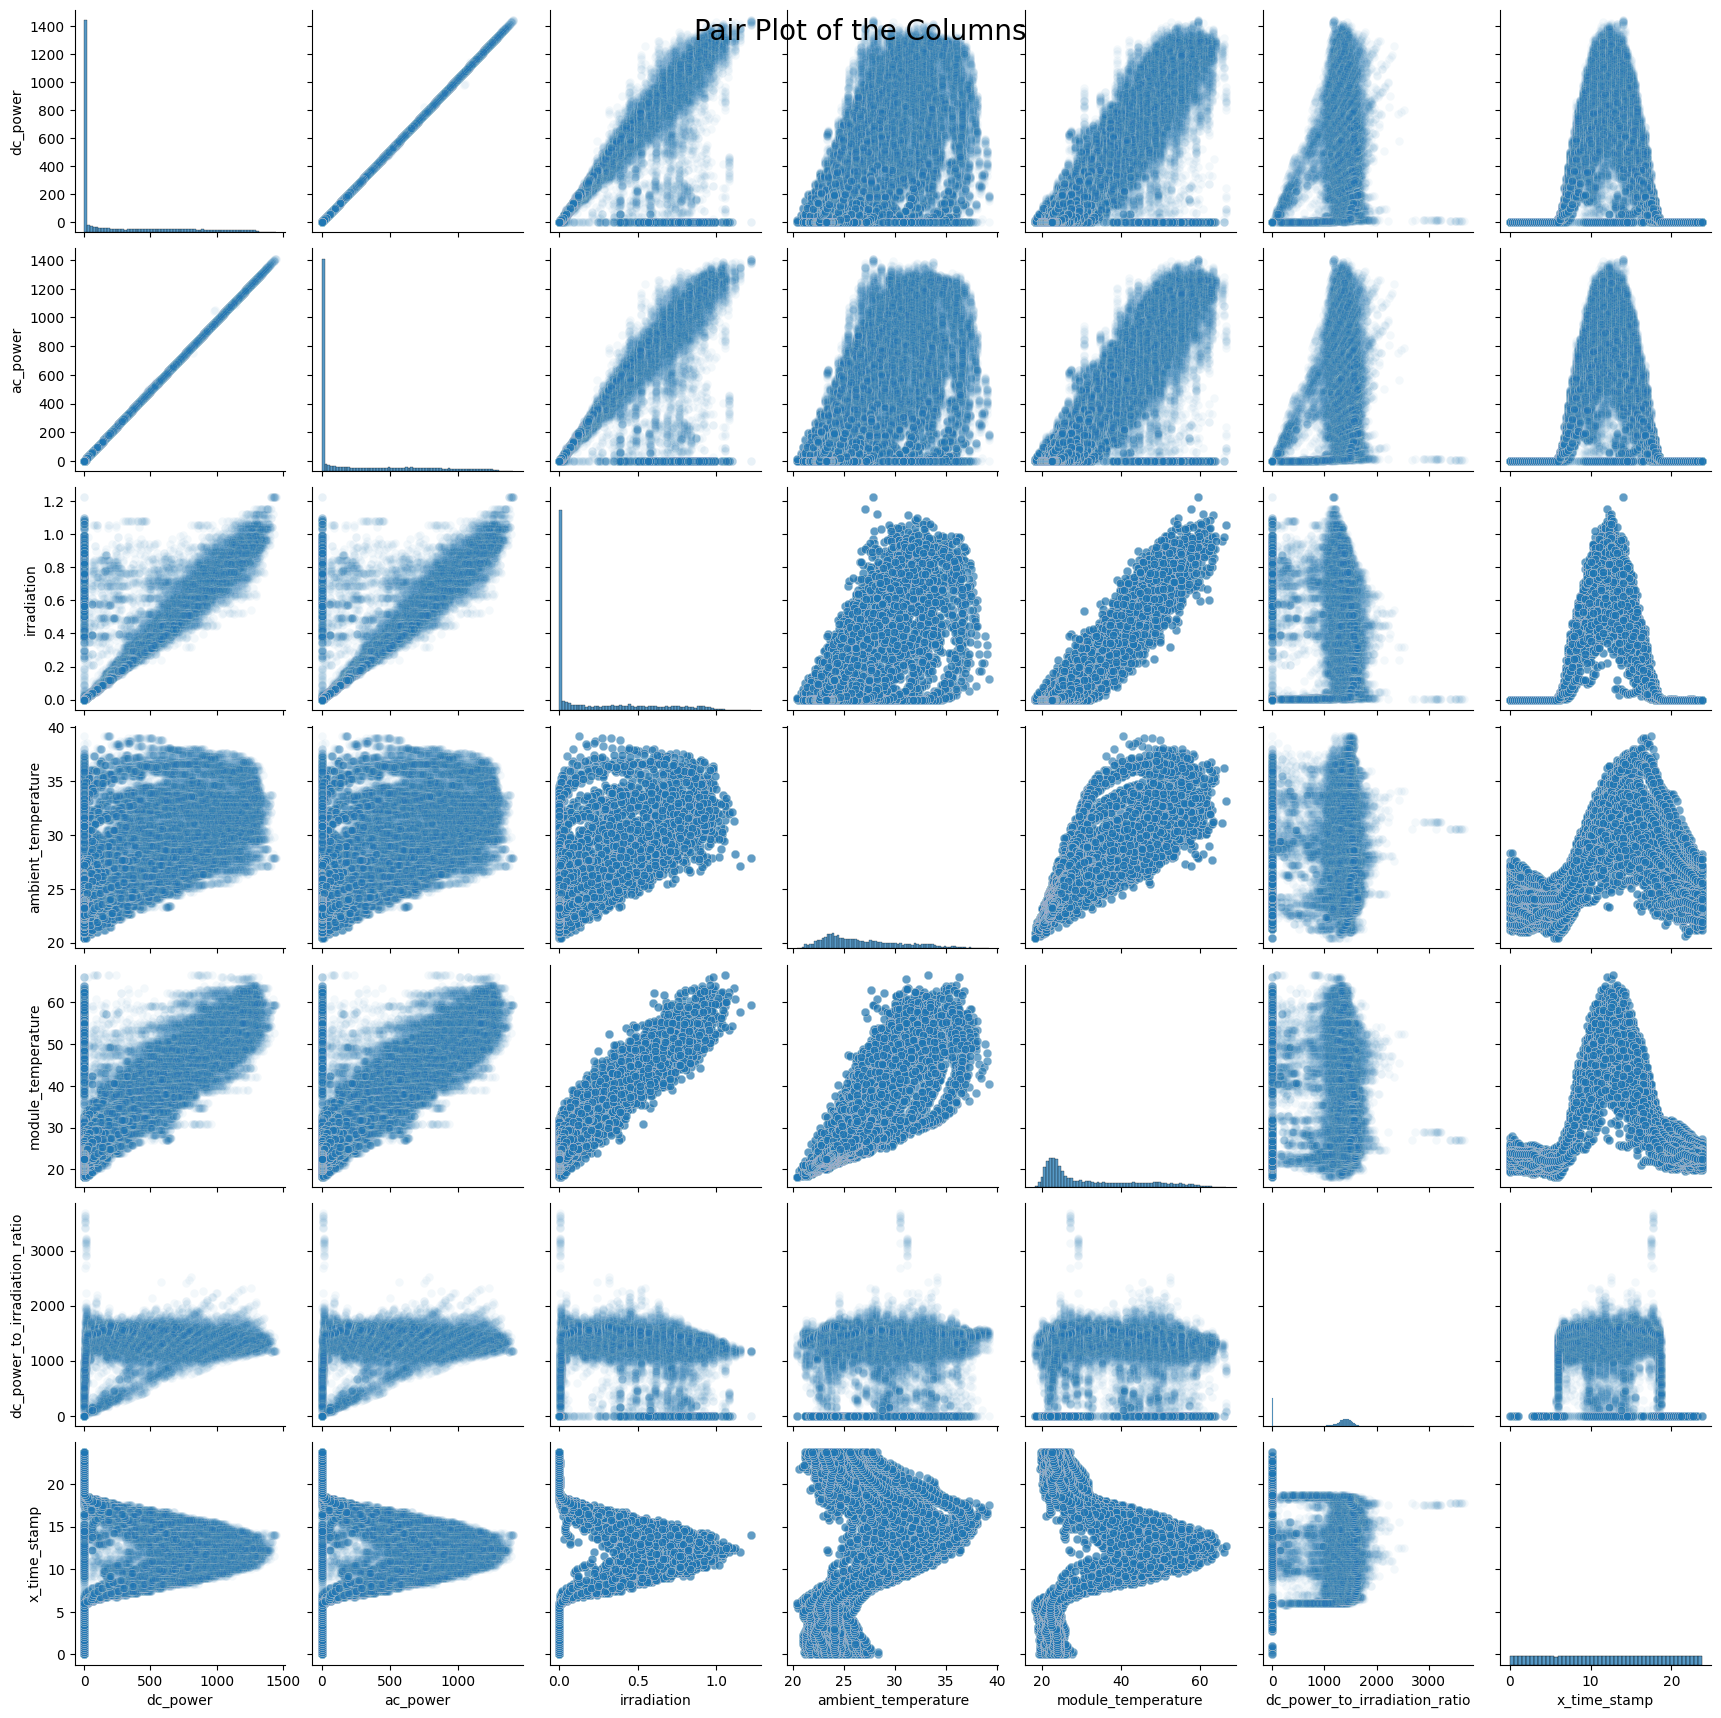

In [9]:
##Pair plot to determine if there are any other obvious data quality issues
g = sns.pairplot(concatDFbeforeFilter[['dc_power','ac_power','irradiation','ambient_temperature','module_temperature','dc_power_to_irradiation_ratio','x_time_stamp']], plot_kws={'alpha': 0.05})
g.fig.suptitle('Pair Plot of the Columns', fontsize = 20)

##### <a id='toc1_4_1_1_2_'></a>[Feature Engineering to Remove the Outliers](#toc0_)

In the above analysis, we determined that there were significant outliers in ratio of dc_power to irradiation. This is due to the grid not being able to handle the power generated by the solar panels. This required the panels to be shutdown.

Since that data isn't important for the analysis of predicting the potential power, I will remove these outliers from the dataset. This will include removing the rows where the dc_power is 0 and the rows that are adjacent to the rows where the dc_power is 0. I chose to remove the adjacent rows because I will not be able to determine if the inverter was shut off at specific 15 minute intervals or if the inverter was shut off sometime between the last data sample. This will ensure that I don't have observations where the inverter was only active a portion of the duration. 

I will also remove where there are outliers in the ratio of dc_power to irradiation since that also implies that the solar panels were shut down.

After I removed the outliers I plotted the data again to ensure that the there were no other issues that I noticed in the data. 

In [10]:
#Remove the rows adjacent to the dc_power = 0 rows to ensure all partial samples are removed and remove the impossible ratio values
concatDFbeforeFilter.sort_values(by = ['source_key','date_time'], ascending = [True,True], inplace = True)


concatDFbeforeFilter["dc_power_shifted_positive"] = concatDFbeforeFilter["dc_power"].shift(-1)
concatDFbeforeFilter["dc_power_shifted_negative"] = concatDFbeforeFilter["dc_power"].shift(1)

concatDFFilterAdjacent = concatDFbeforeFilter[(concatDFbeforeFilter['dc_power']>0) & 
                                              (concatDFbeforeFilter['dc_power_shifted_positive']>0) & 
                                              (concatDFbeforeFilter['dc_power_shifted_negative'] > 0) & 
                                              (concatDFbeforeFilter['dc_power_to_irradiation_ratio']< math.inf)]

##Data without outliers and rename for clarity in future models
data = filter_outliers(concatDFFilterAdjacent,'dc_power_to_irradiation_ratio', threshold = 3)

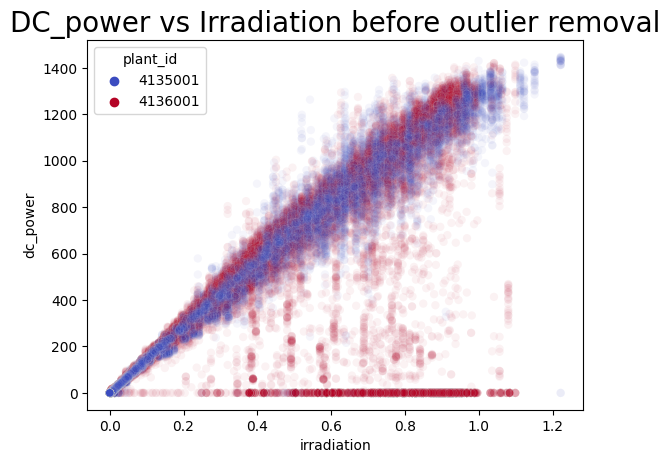

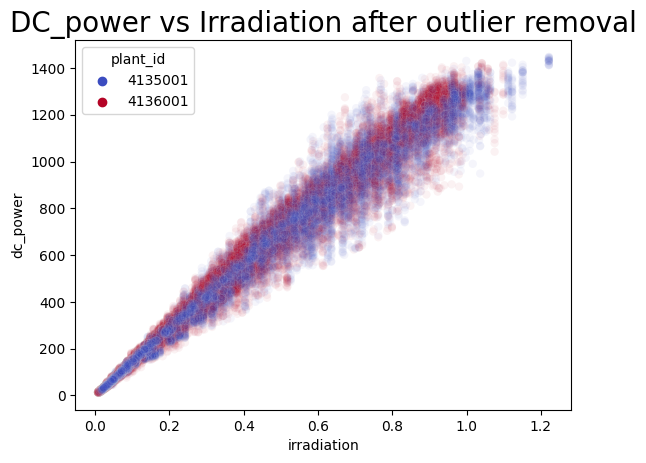

In [11]:
#Scatter plot of DC Power vs Irradiation before the outlier removal
sns.scatterplot(x = 'irradiation', y = 'dc_power', data = concatDFbeforeFilter, hue = 'plant_id', alpha = 0.05, palette = 'coolwarm')
plt.title('DC_power vs Irradiation before outlier removal', fontsize = 20)
plt.show()
#Scatter plot of DC Power vs Irradiation after the outlier removal
sns.scatterplot(x = 'irradiation', y = 'dc_power', data = data, hue = 'plant_id', alpha = 0.05, palette = 'coolwarm')
plt.title('DC_power vs Irradiation after outlier removal', fontsize = 20)
plt.show()

In [12]:
data.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield', 'ambient_temperature',
       'module_temperature', 'irradiation', 'day', 'month', 'hour', 'minute',
       'x_time_stamp', 'dc_power_to_irradiation_ratio',
       'dc_power_shifted_positive', 'dc_power_shifted_negative'],
      dtype='object')

Text(0.5, 0.98, 'Pair Plot of the Columns')

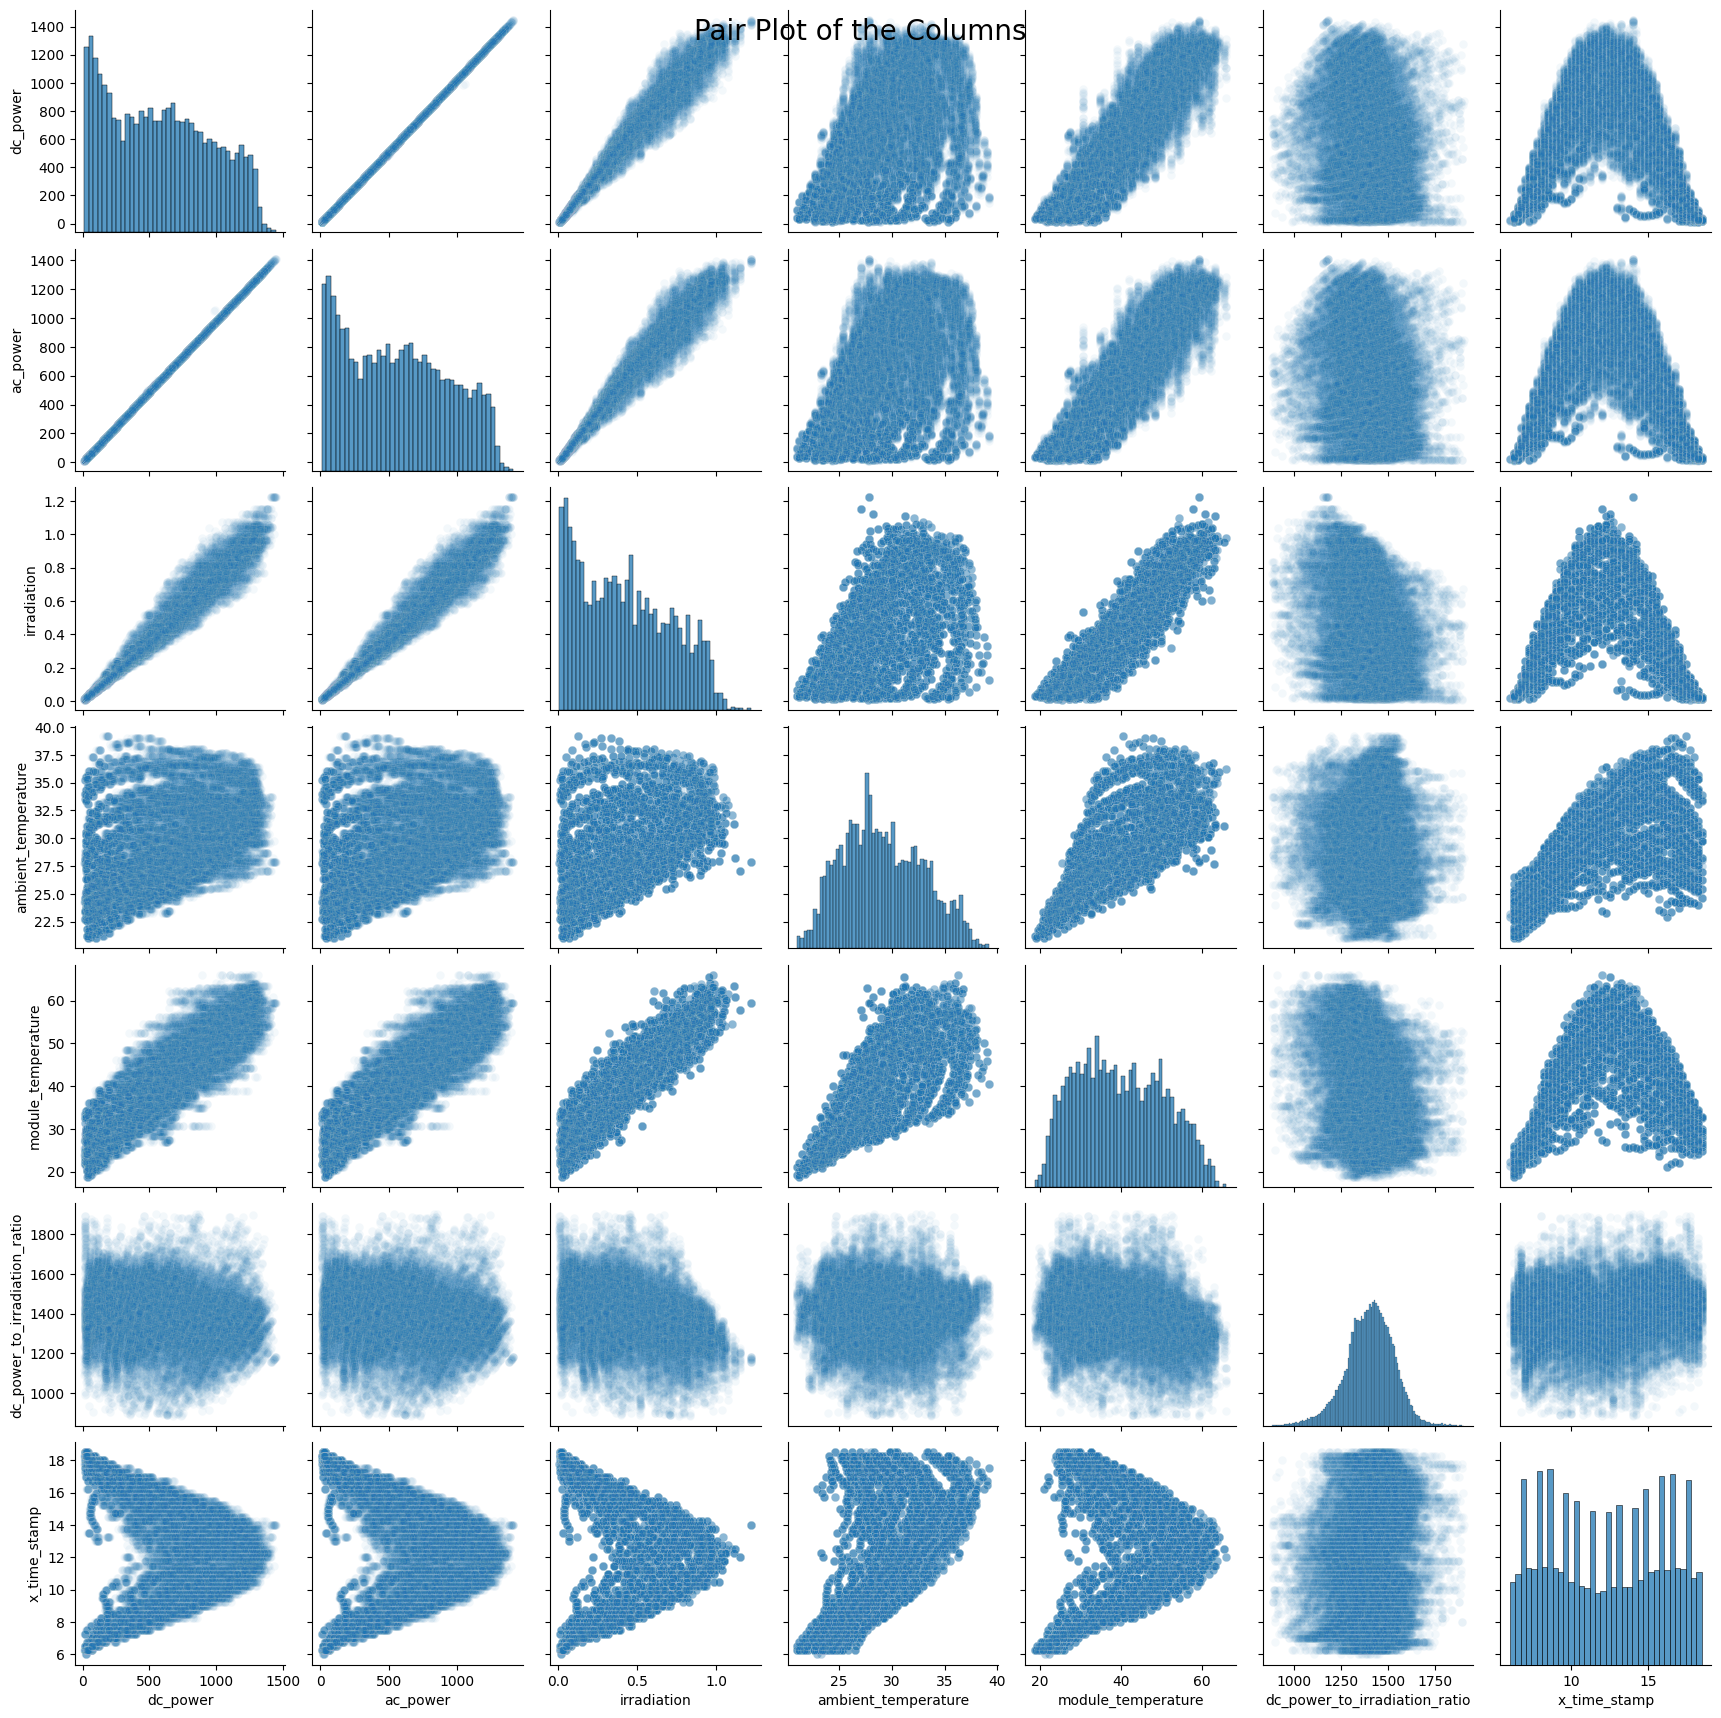

In [13]:
##Pair plot to determine if there are any other obvious data quality issues after the removal of the outliers in dc_power_to_irradiation_ratio
g = sns.pairplot(data[['dc_power','ac_power','irradiation','ambient_temperature','module_temperature','dc_power_to_irradiation_ratio','x_time_stamp']], plot_kws={'alpha': 0.05})
g.fig.suptitle('Pair Plot of the Columns', fontsize = 20)

##### <a id='toc1_4_1_1_3_'></a>[Feature Engineering x_time_stamp](#toc0_)

Since the x_time_stamp (hours from midnight) isn't linear with the dc_power, I will transform the x_time_stamp into a polynomial feature after I run the model without the polynomial features. This will be completed in the section titled "Polynomial Features/Polynomial Regression".

<AxesSubplot: xlabel='x_time_stamp', ylabel='irradiation'>

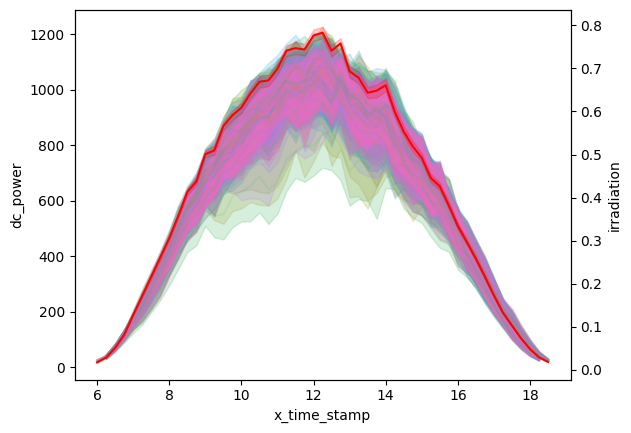

In [14]:
#Plot the dc_power and irradiation to understand the relationship between the x_time_stamp
sns.lineplot(data = data, x = 'x_time_stamp',y = 'dc_power', hue = 'source_key', alpha = 0.1, legend = False)
ax2 = plt.gca().twinx()
sns.lineplot(data = data, x = 'x_time_stamp',y = 'irradiation', ax = ax2, color = 'red')

##### <a id='toc1_4_1_1_4_'></a>[Collinearity Analysis with Variance Inflation Factor](#toc0_)

Upon analysis of the collinearity it was determined that all of the source_keys and plant_ids were highly correlated with each other. This is expected since the source_key is the serial number of the inverter and the plant_id is the plant where the inverter is located. However, since part of the problem that I am attempting to solve is understanding when hardware starts to fail, I will keep the source_key and plant_id in the dataset. I will use other techniques to determine what features aren't significant in the model.

In [15]:
#Computer the VIF for the features
import warnings
warnings.filterwarnings('ignore') #There are several perfect multicollinearity warnings that can be ignored

vif_data = data[['plant_id','source_key','irradiation','ambient_temperature','module_temperature','day','month','x_time_stamp']]
vif_data = pd.get_dummies(vif_data, columns = ['plant_id','source_key'])
vif = pd.DataFrame()
features_list = list(vif_data.columns)
vif['Features'] = features_list

## Drop nan and inf values
concatDFbeforeFilterforVIC = vif_data[features_list].replace([np.inf, -np.inf], np.nan).dropna()

## Compute the VIF
vif['VIF'] = [variance_inflation_factor(vif_data, feature_name = features_list[i],print_summary=False) for i in range(vif_data[features_list].shape[1])]


In [16]:
## Sort the VIF values and report their VIF values
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = True)
#Print the VIF values for features that are not infinite. All the source_key features are infinite
vif[vif['VIF']<np.inf]

Features    VIF
5         x_time_stamp   2.80
3                  day   4.39
4                month   4.97
1  ambient_temperature   8.84
0          irradiation  12.01
2   module_temperature  20.99

##### <a id='toc1_4_1_1_5_'></a>[EDA Summary](#toc0_)

The biggest difficulty that I faced in the data cleaning and EDA portion of this report was trying to find a way to best remove the outliers that were seen from the plant being taken offline during periods of excessive power production. I chose to remove the rows where the dc_power was 0 and the rows that were adjacent to the rows where the dc_power was 0. I also chose to do some feature engineering by creating the dc_power_to_irradiation_ratio. This decision was made based off of domain knowledge and the scatter plots that highlighted the outliers in the data. Once I removed the outliers, I just ran a little test of fitting a linear regression model. The data without the outliers had an r-squared above 0.978 and the data with the outliers had an r-squared of 0.767. This shows that the outliers were having a significant impact on the model's performance. This will be shown in the "Linear Regression" section of this report.

I also discovered and expected collinearity with the source_key for the inverters; however, I chose to keep them in the model to provide a baseline for future expectations of performance. This was necessary if this model is expected to be able to provide information on hardware failure. Despite the irradiation being the primary predictor, the serial numbers were show to still be statistically significant for the model's performance as shown in the "Linear Regression" section of this report.

## <a id='toc1_5_'></a>[Model Generation](#toc0_)

I will use multiple models to try and predict the dc_power. I will use the following models:
- Linear Regression
  - Without Outliers
  - With Outliers for comparison
- Polynomial Regress
- Random Forest
- adaBoost
- Gradient Boost

In order to evaluate the models, I will print out the r-squared score of the model in addition to plotting the residuals. I chose the r^2 metric because it is a measure of how well future samples are likely to be predicted by the model. Once I have the model, I will use the test data to evaluate the model's ability to generalize the data. This is to ensure that the model isn't over-fitting the data. In the results section, I will compare the models to each other and determine which model is the best fit for the data.

In [22]:
#Model location filepath
model_path = 'models'

#Build X and y datasets without outliers. Dropped the columns that are not needed for the 
#model because they are either calculations of the data or colinear with other features (ex. hour and minute with x_time_stamp)
X = data.drop(columns = ['dc_power','date_time','plant_id','ac_power','daily_yield','total_yield',
                         'hour','minute','dc_power_to_irradiation_ratio','dc_power_shifted_positive','dc_power_shifted_negative'])

# One hot encoding for categorical variable source_key (inverter serial number)
X = pd.get_dummies(X, columns = ['source_key'])

#Target variable
y = data['dc_power']

#Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

#Add constant for statsmodels
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

##Data with outliers
data_with_outliers = concatDFbeforeFilter
data_with_outliers.drop(columns=['date_time','plant_id','ac_power','daily_yield','total_yield',
                         'hour','minute','dc_power_to_irradiation_ratio','dc_power_shifted_positive','dc_power_shifted_negative'], inplace = True)
X_outliers = data_with_outliers.drop(columns = ['dc_power'])
X_outliers = pd.get_dummies(X_outliers, columns = ['source_key'])
y_outliers = data_with_outliers['dc_power']
X_train_outliers,X_test_outliers,y_train_outliers,y_test_outliers = train_test_split(X_outliers,y_outliers,test_size = 0.2, random_state = 42)
X_train_outliers = sm.add_constant(X_train_outliers)
X_test_outliers = sm.add_constant(X_test_outliers)

### <a id='toc1_5_1_'></a>[Linear Regression and Polynomial Regression](#toc0_)

Summary of the linear regression models:

1. Linear Regression without Outliers
   1. Since the model determined that the serial number of the inverters were significant based on their p-value, this implies that there is difference in inverter performance. Further data needs to be gathered to understand if the difference is due to different hardware, faulty hardware, dirty panels, or other potential sources of variation. This future analysis should be done; however, that is outside the scope of this project.
   2. In the forward selection model, it selected 41 features for the ideal model. Only one of the features became insignificant (source_key_LlT2YUhhzqhg5Sw) after the other features were added. This forward selection process ran until the model only had insignificant features left.
2. Linear Regression with Outliers
   1. This model was run to compare the performance of the model with the outliers to the model without the outliers. The model without the outliers had an r-squared of 0.978 and the model with the outliers had an r-squared of 0.767. This shows that the outliers were having a significant impact on the model's performance.
   2. In order to have the best model, I will use the model without the outliers since the outliers only occurred when the plant was taken offline due to overpowering the grid. 

#### <a id='toc1_5_1_1_'></a>[Forward Selection of Features without Outliers](#toc0_)

In [90]:
##Select best features from the data without outliers
best_features, ols_model = forward_selection(X_train,y_train)

#Save the model
joblib.dump(ols_model, os.path.join(model_path, 'ols_model.pkl'))

##Print the information about the best features
print("Feature, p-value, adjusted R^2:\n")
for key, value in best_features.items():
    print(key, value)

Feature, p-value, adjusted R^2:

irradiation (0.0, 0.9746659792698716)
source_key_Quc1TzYxW2pYoWX (0.0, 0.9757064068251208)
month (3.6498935499972564e-186, 0.9761912815681737)
ambient_temperature (6.062068956151132e-293, 0.9769381545533012)
source_key_bvBOhCH3iADSZry (1.4828508644945337e-116, 0.9772253506442744)
source_key_Et9kgGMDl729KT4 (1.6713623129998394e-109, 0.9774915921034207)
source_key_1BY6WEcLGh8j5v7 (9.447278930559111e-95, 0.9777187486072327)
source_key_rrq4fwE8jgrTyWY (1.046643227579298e-43, 0.9778200852707739)
source_key_LYwnQax7tkwH5Cb (1.6860481910725233e-25, 0.9778770800641564)
module_temperature (1.2943172942187097e-24, 0.9779318046919271)
source_key_adLQvlD726eNBSB (3.6910566543855494e-20, 0.9779757354280458)
source_key_oZ35aAeoifZaQzV (6.636954369781763e-19, 0.9780165869743764)
source_key_4UPUqMRk7TRMgml (3.110022101249188e-20, 0.978060528172972)
source_key_ih0vzX44oOqAx2f (8.039942606867147e-15, 0.9780915399718374)
source_key_PeE6FRyGXUgsRhN (4.804455730066444e-15, 

###### <a id='toc1_5_1_1_1_1_'></a>[Results](#toc0_)

In [40]:
#Print a summary of the OLS model

ols_model = joblib.load(os.path.join(model_path, 'ols_model.pkl'))
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.748e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:46:51   Log-Likelihood:            -2.2805e+05
No. Observations:               41956   AIC:                         4.562e+05
Df Residuals:                   41915   BIC:                         4.565e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Rsquared Score: 0.9771782653041474


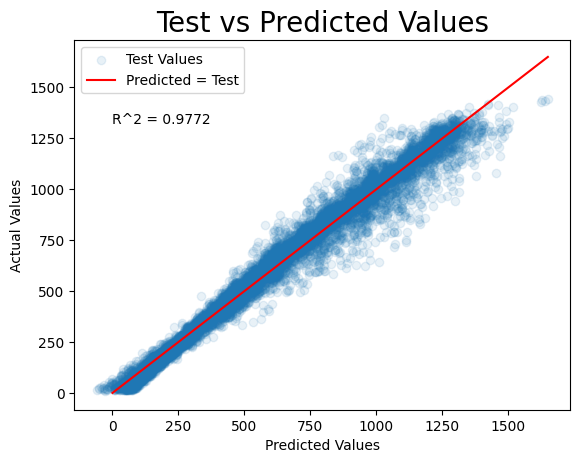

In [47]:
##Plot the test vs predicted values for the OLS model
features_list = list(ols_model.params.index)
y_pred_ols = ols_model.predict(X_test[features_list])

#Determine the ideal line for the plot
x = np.linspace(0, max(y_pred_ols), 1000)
y = x

print(f'Rsquared Score: {r2_score(y_test, y_pred_ols)}')

plt.scatter(x = y_pred_ols, y = y_test, alpha = 0.1, label = 'Test Values')
plt.plot(x, y, color = 'red', label = 'Predicted = Test')
plt.title('Test vs Predicted Values', fontsize = 20)
plt.text(0, 0.8*max(y_pred_ols), f'R^2 = {round(r2_score(y_test, y_pred_ols),4)}', fontsize = 10)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.savefig('images/ols_test_vs_predicted.png')
plt.show()

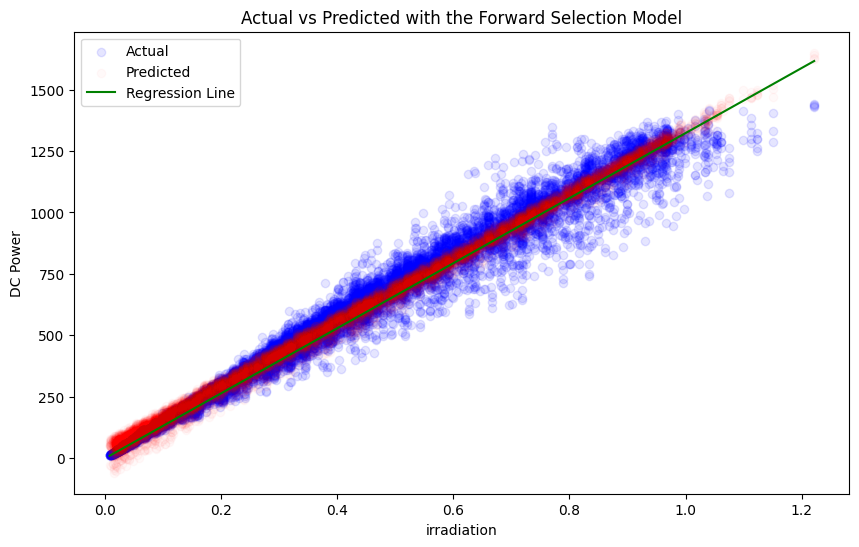

In [35]:
#Plot the test and predicted values vs irradiation
plot_actual_vs_predicted(ols_model, X_test, y_test, 'irradiation')

#### <a id='toc1_5_1_2_'></a>[Forward Selection of Features with Outliers](#toc0_)

In [126]:
#Run the forward selection algorithm on the data with outliers
best_features_with_outliers,ols_model_outlier = forward_selection(X_train_outliers,y_train_outliers)

#Save the model
joblib.dump(ols_model_outlier, os.path.join(model_path, 'ols_model_with_outliers.pkl'))

##Print the information about the best features
print("Feature, p-value, adjusted R^2:\n")
for key, value in best_features_with_outliers.items():
    print(key, value)

Feature, p-value, adjusted R^2:

irradiation (0.0, 0.7504714808699537)
source_key_Quc1TzYxW2pYoWX (9.196909038366164e-165, 0.7525191140745627)
module_temperature (2.1397293098366064e-163, 0.7545329558236192)
ambient_temperature (1.005677491826219e-308, 0.7583187007897205)
source_key_Et9kgGMDl729KT4 (1.685036492328268e-112, 0.7596660933981063)
source_key_LYwnQax7tkwH5Cb (1.090688806789156e-99, 0.7608507948870082)
source_key_rrq4fwE8jgrTyWY (5.520711067202813e-75, 0.7617317292535072)
source_key_q49J1IKaHRwDQnt (9.298262577357635e-52, 0.7623302816401254)
source_key_81aHJ1q11NBPMrL (7.050678460491541e-43, 0.7628209226154267)
source_key_xoJJ8DcxJEcupym (6.023719465786919e-36, 0.7632277073534982)
source_key_9kRcWv60rDACzjR (9.037981194855572e-37, 0.7636436251019996)
source_key_WcxssY2VbP4hApt (1.077632388684895e-35, 0.7640460001420118)
source_key_LlT2YUhhzqhg5Sw (5.276898748097564e-36, 0.764451380435982)
source_key_PeE6FRyGXUgsRhN (1.019680938742181e-34, 0.7648408090724541)
source_key_oZZkBa

###### <a id='toc1_5_1_2_1_1_'></a>[Results](#toc0_)

In [35]:
#Print a summary of the OLS model with outliers
ols_model_outlier = joblib.load(os.path.join(model_path, 'ols_model_with_outliers.pkl'))

print(ols_model_outlier.summary())

                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                 1.029e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:15:23   Log-Likelihood:            -6.0335e+05
No. Observations:               90702   AIC:                         1.207e+06
Df Residuals:                   90672   BIC:                         1.207e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Rsquared Socre: 0.7663317560994336


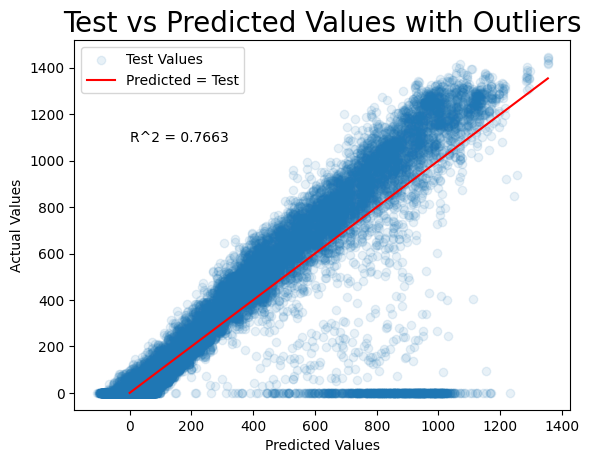

In [49]:
##Plot the test vs predicted values for the OLS model with outliers
features_list = list(ols_model_outlier.params.index)
y_pred_outliers = ols_model_outlier.predict(X_test_outliers[features_list])

#Determine the ideal line for the plot
x = np.linspace(0, max(y_pred_outliers), 1000)
y = x

print(f'Rsquared Socre: {r2_score(y_test_outliers, y_pred_outliers)}')

plt.scatter(x = y_pred_outliers, y = y_test_outliers, alpha = 0.1, label = 'Test Values')
plt.plot(x, y, color = 'red', label = 'Predicted = Test')
plt.title('Test vs Predicted Values with Outliers', fontsize = 20)
plt.text(0, 0.8*max(y_pred_outliers), f'R^2 = {round(r2_score(y_test_outliers, y_pred_outliers),4)}', fontsize = 10)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.savefig('images/ols_test_with_outliers_vs_predicted.png')
plt.show()

#### <a id='toc1_5_1_3_'></a>[Polynomial Features/Polynomial Regression](#toc0_)

I decided to use a polynomial feature to see if it would improve the model's performance because the x_time_stamp is not linear with the dc_power. The nature of this relationship is shown in the line graph below (Mean DC Power vs Time Stamp). I used the below code to create the polynomial features. I then ran the forward selection model to determine which features were significant in the model and printed the summary.

Looking at the graphs of the DC Power vs Time Stamp, it is clear that the relationship between the two variables is not linear. The polynomial feature iteration was able to determine that a 6 degree polynomial feature best fit the data. As the number of degrees increased, the p-value for the features implied that the feature was not statistically significant. I will then use that information to perform a polynomial regression with the x_time_stamp feature transformed into a 6 degree polynomial feature for future models (Polynomial Regression and Decision Trees).

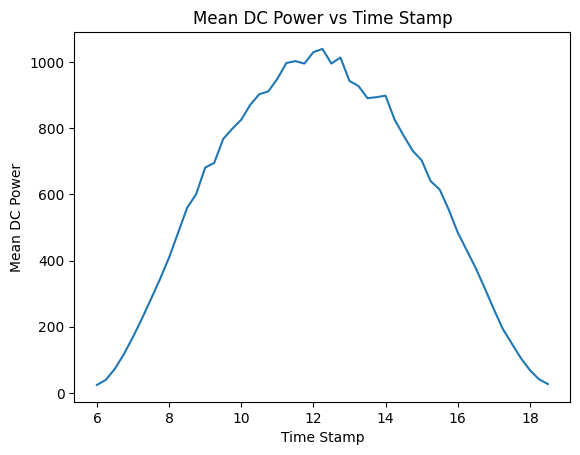

In [44]:
#Plot the average values of the dc_power for each time stamp
data_dc_power_vs_x_time_stamp = data[['dc_power','x_time_stamp']]

df_mean = data_dc_power_vs_x_time_stamp.groupby('x_time_stamp').mean()

plt.plot(df_mean.index, df_mean['dc_power'])
plt.xlabel('Time Stamp')
plt.ylabel('Mean DC Power')
plt.title('Mean DC Power vs Time Stamp')
plt.show()

Degree =  1
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.02677
Date:                Sat, 25 Feb 2023   Prob (F-statistic):              0.871
Time:                        20:41:22   Log-Likelihood:                -290.29
No. Observations:                  40   AIC:                             584.6
Df Residuals:                      38   BIC:                             588.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        595.2769    188.009      3.

C:\Users\Megan\AppData\Local\Temp\ipykernel_4512\4086418569.py:250: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.poly = pd.DataFrame(X_train_poly)
C:\Users\Megan\AppData\Local\Temp\ipykernel_4512\4086418569.py:251: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_test.poly = pd.DataFrame(X_test_poly)


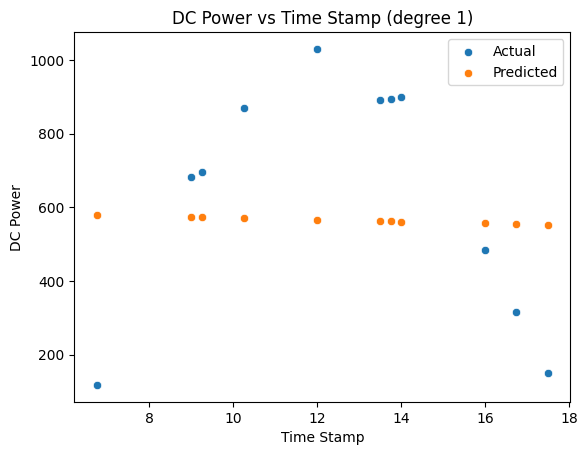



Degree =  2
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     642.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.85e-29
Time:                        20:41:22   Log-Likelihood:                -218.78
No. Observations:                  40   AIC:                             443.6
Df Residuals:                      37   BIC:                             448.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3078.0426    107.345    -2

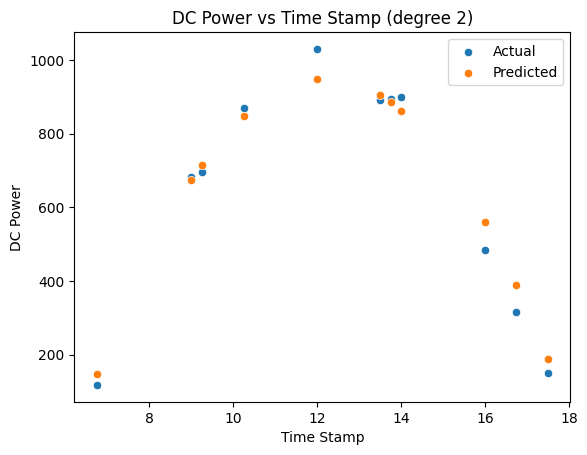



Degree =  3
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     447.4
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.55e-28
Time:                        20:41:22   Log-Likelihood:                -217.40
No. Observations:                  40   AIC:                             442.8
Df Residuals:                      36   BIC:                             449.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3641.2284    366.933     -

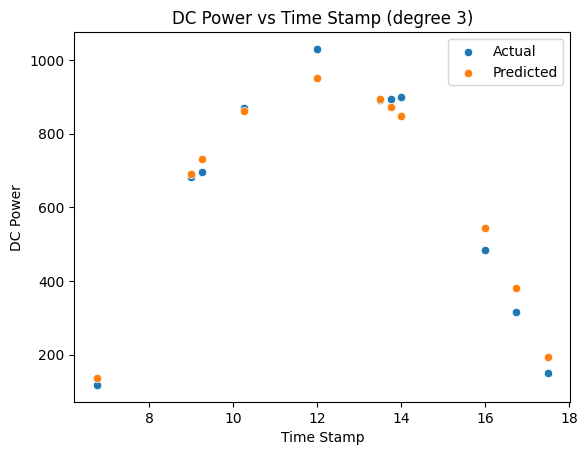



Degree =  4
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4094.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           3.33e-46
Time:                        20:41:23   Log-Likelihood:                -167.30
No. Observations:                  40   AIC:                             344.6
Df Residuals:                      35   BIC:                             353.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3450.8830    372.908      

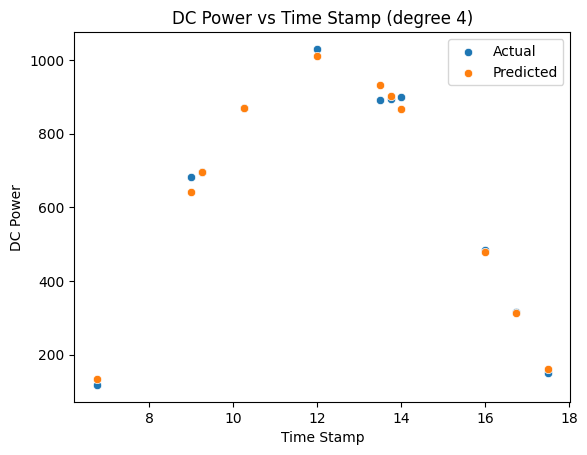



Degree =  5
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3324.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.09e-44
Time:                        20:41:23   Log-Likelihood:                -166.43
No. Observations:                  40   AIC:                             344.9
Df Residuals:                      34   BIC:                             355.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4997.7971   1311.357      

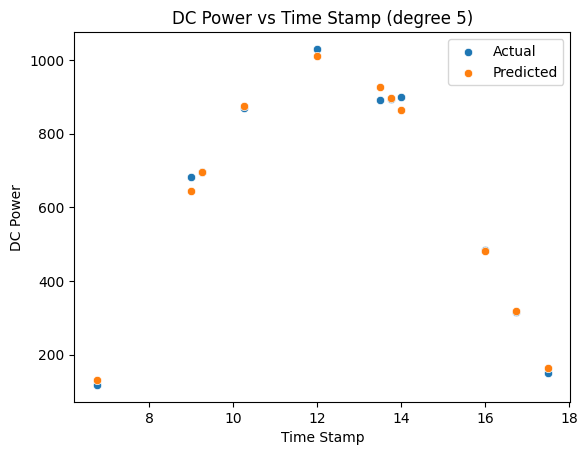



Degree =  6
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3619.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           4.96e-45
Time:                        20:41:23   Log-Likelihood:                -160.49
No. Observations:                  40   AIC:                             335.0
Df Residuals:                      33   BIC:                             346.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.877e+04   4236.018      

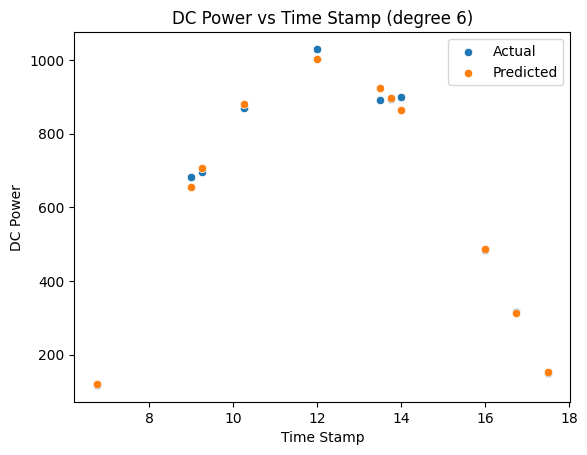



Degree =  7
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3008.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           3.14e-43
Time:                        20:41:23   Log-Likelihood:                -160.49
No. Observations:                  40   AIC:                             337.0
Df Residuals:                      32   BIC:                             350.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.869e+04    1.6e+04      

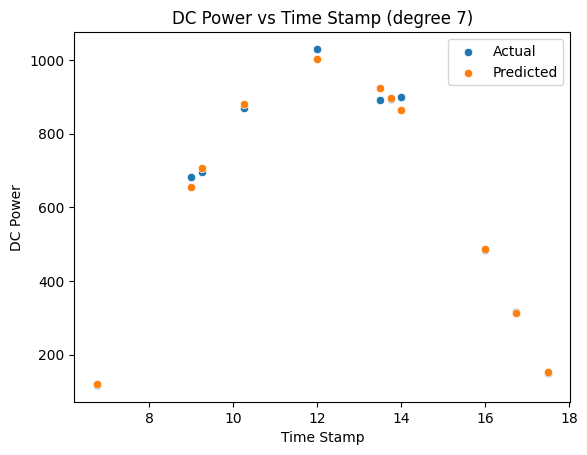



Degree =  8
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2850.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           3.22e-42
Time:                        20:41:24   Log-Likelihood:                -158.27
No. Observations:                  40   AIC:                             334.5
Df Residuals:                      31   BIC:                             349.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.147e+05   5.26e+04      

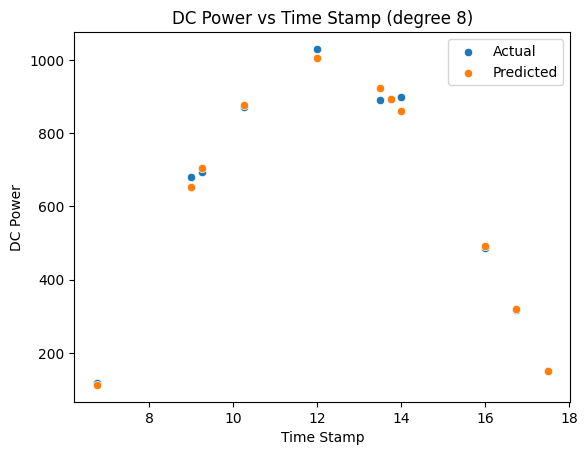



Degree =  9
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2803.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           4.16e-42
Time:                        20:41:24   Log-Likelihood:                -158.60
No. Observations:                  40   AIC:                             335.2
Df Residuals:                      31   BIC:                             350.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8042.1814   3287.647      

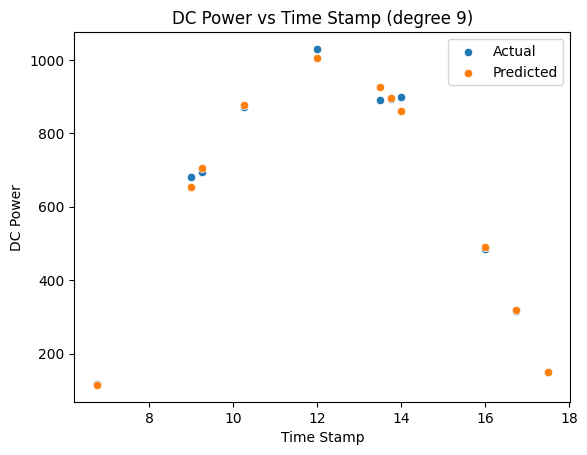



Degree =  10
                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2634.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.09e-41
Time:                        20:41:24   Log-Likelihood:                -159.84
No. Observations:                  40   AIC:                             337.7
Df Residuals:                      31   BIC:                             352.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        381.0937    165.108     

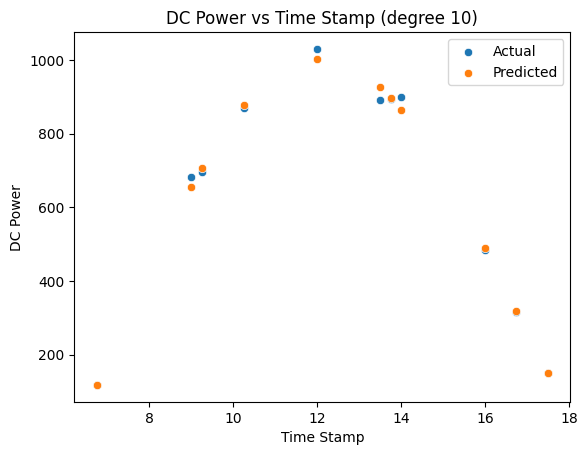

In [45]:
##Create a polynomial regression model to predict the dc_power based on the time stamp using the mean dataframe to speed up the iteration process
from sklearn.preprocessing import PolynomialFeatures

## Iterate through a range of degrees to get the predicted OLS model and plot the actual vs predicted values
X_train_timestamp, X_test_timestamp,y_train_timestamp,y_test_timestamp = train_test_split(df_mean.index,df_mean['dc_power'],test_size = 0.2, random_state = 42)
X_train_timestamp = pd.DataFrame(X_train_timestamp)
X_test_timestamp = pd.DataFrame(X_test_timestamp)
y_train_timestamp = pd.Series(y_train_timestamp)
y_test_timestamp = pd.Series(y_test_timestamp)


from sklearn.preprocessing import PolynomialFeatures


#Iterate through a range of degrees to get the predicted OLS model and plot the actual vs predicted values
for i in range(1,11):
    print("Degree = ", i)
    #if i == 1:
    #    X_train_timestamp.reshape(-1,1)
    #    X_test_timestamp.reshape(-1,1)
    X_train_poly, X_test_poly = polynomial_features(X_train_timestamp, X_test_timestamp, i)
    ols_model = sm.OLS(endog = y_train_timestamp, exog = X_train_poly)
    poly_model = ols_model.fit()
    print(poly_model.summary())
    
    #Plot the actual vs predicted values

    plt.figure()
    sns.scatterplot(x = X_test_timestamp.values.flatten(), y = y_test_timestamp.values)
    sns.scatterplot(x = X_test_timestamp.values.flatten(), y = poly_model.predict(X_test_poly), legend = True)
    plt.legend(['Actual','Predicted'])
    plt.xlabel('Time Stamp')
    plt.ylabel('DC Power')
    plt.title(f'DC Power vs Time Stamp (degree {i})')
    plt.show()
    print("\n")

In [28]:
##Data with timestamp as a 6 degree polynomial feature
#In the analysis above, it was determined that a 6 degree polynomial feature was the best fit for the x_time_stamp feature
data_timestamp_6_degree_train = X_train.copy()
data_timestamp_6_degree_train['x_time_stamp2'] = data_timestamp_6_degree_train['x_time_stamp']**2
data_timestamp_6_degree_train['x_time_stamp3'] = data_timestamp_6_degree_train['x_time_stamp']**3
data_timestamp_6_degree_train['x_time_stamp4'] = data_timestamp_6_degree_train['x_time_stamp']**4
data_timestamp_6_degree_train['x_time_stamp5'] = data_timestamp_6_degree_train['x_time_stamp']**5
data_timestamp_6_degree_train['x_time_stamp6'] = data_timestamp_6_degree_train['x_time_stamp']**6
#data_timestamp_6_degree_train = data_timestamp_6_degree_train.drop(columns = ['dc_power'])

data_timestamp_6_degree_test = X_test.copy()
data_timestamp_6_degree_test['x_time_stamp2'] = data_timestamp_6_degree_test['x_time_stamp']**2
data_timestamp_6_degree_test['x_time_stamp3'] = data_timestamp_6_degree_test['x_time_stamp']**3
data_timestamp_6_degree_test['x_time_stamp4'] = data_timestamp_6_degree_test['x_time_stamp']**4
data_timestamp_6_degree_test['x_time_stamp5'] = data_timestamp_6_degree_test['x_time_stamp']**5
data_timestamp_6_degree_test['x_time_stamp6'] = data_timestamp_6_degree_test['x_time_stamp']**6

#X_train_timestamp_6_degree,X_test_timestamp_6_degree,y_train_timestamp_6_degree,y_test_timestamp_6_degree = train_test_split(X_timestamp_6_degree,y_timestamp_6_degree,test_size = 0.2, random_state = 42)
#X_train_timestamp_6_degree = sm.add_constant(X_train_timestamp_6_degree)
#X_test_timestamp_6_degree = sm.add_constant(X_test_timestamp_6_degree)

In [63]:
##Select best features from the data without outliers and the timestamp as a 6 degree polynomial feature
best_features_poly, ols_model_poly = forward_selection(data_timestamp_6_degree_train,y_train)

#Save the model
joblib.dump(ols_model_poly, os.path.join(model_path, 'ols_model_poly.pkl'))

##Print the information about the best features
print("Feature, p-value, adjusted R^2:\n")
for key, value in best_features_poly.items():
    print(key, value)

Feature, p-value, adjusted R^2:

irradiation (0.0, 0.9746659792698716)
source_key_Quc1TzYxW2pYoWX (0.0, 0.9757064068251208)
month (3.6498935499972564e-186, 0.9761912815681737)
ambient_temperature (6.062068956151132e-293, 0.9769381545533012)
x_time_stamp6 (8.16598404125645e-120, 0.9772334823798897)
x_time_stamp (0.0, 0.9789443424002355)
source_key_bvBOhCH3iADSZry (2.547232410595928e-144, 0.9792697455764533)
module_temperature (4.3618475736363384e-127, 0.9795515376640248)
source_key_Et9kgGMDl729KT4 (1.8576223704666486e-122, 0.979819269743865)
source_key_1BY6WEcLGh8j5v7 (1.0955736038224695e-105, 0.9800468679158433)
x_time_stamp2 (4.4978303191331947e-66, 0.9801861395165434)
source_key_rrq4fwE8jgrTyWY (5.319204921794335e-52, 0.9802941321907919)
source_key_LYwnQax7tkwH5Cb (1.509539148276051e-29, 0.9803534363823236)
source_key_oZ35aAeoifZaQzV (4.1557149952167194e-24, 0.9804009599953867)
source_key_4UPUqMRk7TRMgml (8.174038076903659e-26, 0.9804519989579374)
source_key_adLQvlD726eNBSB (1.218213

###### <a id='toc1_5_1_3_1_1_'></a>[Results](#toc0_)

In [29]:
#Print the model summary
ols_model_poly = joblib.load(os.path.join(model_path, 'ols_model_poly.pkl'))

print(ols_model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:               dc_power   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 4.987e+04
Date:                Mon, 27 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:11:08   Log-Likelihood:            -2.2555e+05
No. Observations:               41956   AIC:                         4.512e+05
Df Residuals:                   41912   BIC:                         4.516e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Rsquared Score: 0.979742205004171


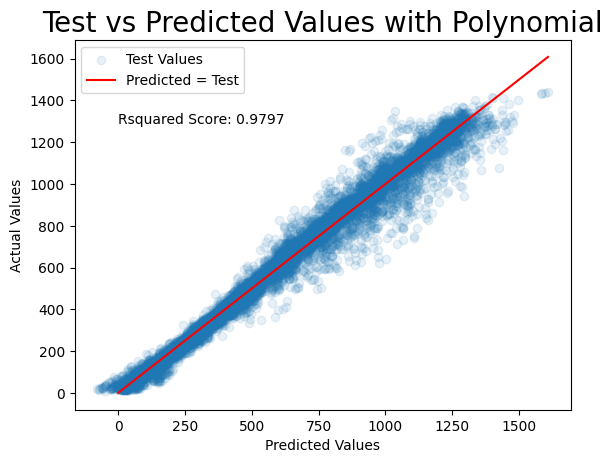

In [71]:
##Plot the test vs predicted values for the OLS model with outliers
features_list = list(ols_model_poly.params.index)
y_pred_poly = ols_model_poly.predict(data_timestamp_6_degree_test[features_list])

#Determine the ideal line for the plot
x = np.linspace(0, max(y_pred_poly), 1000)
y = x

print(f'Rsquared Score: {r2_score(y_test, y_pred_poly)}')

plt.scatter(x = y_pred_poly, y = y_test, alpha = 0.1, label = 'Test Values')
plt.plot(x, y, color = 'red', label = 'Predicted = Test')
plt.title('Test vs Predicted Values with Polynomial', fontsize = 20)
plt.text(0,0.8*max(y_pred_poly), f'Rsquared Score: {round(r2_score(y_test, y_pred_poly),4)}', fontsize = 10)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.savefig('images/ols_test_with_feature_engineering_vs_predicted.png')
plt.show()

#### <a id='toc1_5_1_4_'></a>[Linear Regression and Polynomial Regression Summary](#toc0_)

As we can see in the above predictions and test scores, the polynomial regression model performed better than the linear regression model. This is expected since the relationship between the x_time_stamp and the dc_power is not linear. The linear regression model without feature engineering had an r-squared of 0.978 and the polynomial regression model had an r-squared of 0.981. This shows that the feature engineering completed on the time_stamp has a statistically significant impact on the model's performance.

However, the most significant improvement for these models was removing the outliers in the data that was caused by outside influences of grid production. This is shown in the r-squared values for the linear regression models. The linear regression model without the outliers had an r-squared of 0.978 and the linear regression model with the outliers had an r-squared of 0.767. This shows that the outliers were having a significant impact on the model's performance.

### <a id='toc1_5_2_'></a>[Random Forest Regression](#toc0_)

Since we learned from the linear regression model that the polynomial features for the timestamp improved the model, I will start out with that dataset for the decision tree models.

In this section, I will use gridsearchCV to do some hyperparameter tuning on the random forest. Then I will chose the best parameters and run the model on the test data and plot the performance of the model. Running cross fold validation on decision trees is beneficial because these models have a tendency to over-fit the data. This is because the decision trees are greedy and will try to fit the data as best as possible. By running cross fold validation, we can ensure that the model is generalizing the data and not over-fitting the data.

In [53]:
##Get data for the tree model
X_tree_train = data_timestamp_6_degree_train #Rename the data to be used for the tree model for clarity
X_tree_test = data_timestamp_6_degree_test #Rename the data to be used for the tree model for clarity


In [79]:
##Train a Random Forest Model
rfr = RandomForestRegressor(random_state = 42, n_estimators = 5, max_depth = 10, min_samples_split = 2, min_samples_leaf = 1, max_features = None, bootstrap = True)
model = rfr.fit(X_tree_train, y_train)

print(f'Model train score {model.score(X_tree_train, y_train)}')
print(f'Model test score {model.score(X_tree_test, y_test)}')

Model train score 0.9873066530206269
Model test score 0.9845227915368935


#### <a id='toc1_5_2_1_'></a>[HyperParameter Tuning](#toc0_)

In [54]:
##Hyper parameter tuning for the Random Forest Model

#parameter_grid = {'n_estimators':[10, 15],'max_depth':[None, 5, 10],'min_samples_split':[5,10,20],'min_samples_leaf':[1,5,10],'max_features':[None,'sqrt','log2']}
#Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 15}
#Best cross-validation score: 0.9876522410807599

parameter_grid = {'n_estimators':[150,300,500],'max_depth':[None],'min_samples_split':[20],'min_samples_leaf':[1,2],'max_features':['sqrt']}
#Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
#Best cross-validation score: 0.9868443354599717
rfr = RandomForestRegressor(random_state = 42,bootstrap=True)
grid_search = GridSearchCV(rfr, parameter_grid, cv = 5, n_jobs = -1, verbose = True)
grid_search.fit(X_tree_train, y_train)
model_rf = grid_search.best_estimator_
joblib.dump(model_rf, os.path.join(model_path, 'random_forest_model.pkl'))
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {(grid_search.best_score_)}')
print(f'Model train score {model_rf.score(X_tree_train, y_train)}')
print(f'Model test score {model_rf.score(X_tree_test, y_test)}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
Best cross-validation score: 0.9868443354599717
Model train score 0.9910182888547747
Model test score 0.9868820302717891


###### <a id='toc1_5_2_1_1_1_'></a>[Results](#toc0_)

As we can see above, a set of parameters that performed well was the following:
- max_depth: None
- max_features: sqrt
- min_samples_leaf: 1
- min_samples_split: 20
- n_estimators: 500

These parameters provided a test score of 0.9869 and a train score of 0.9910. This shows that the model is generalizing the data and not over-fitting. It also performs better than the polynomial regression model that was tested in the previous section.

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
R^2: 0.9868820302717891
Rsquared Score: 0.9868820302717891


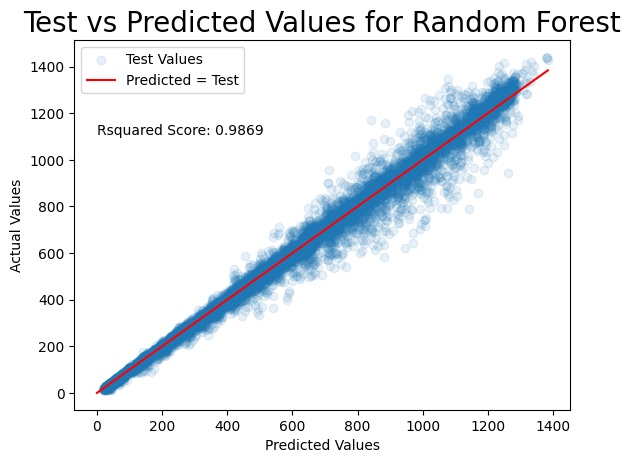

In [56]:
#Plot the actual vs predicted values for the Random Forest Model
model_rf = joblib.load(os.path.join(model_path, 'random_forest_model.pkl'))

yhat_rf = model_rf.predict(X_tree_test)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'R^2: {r2_score(y_test, yhat_rf)}')

#Determine the ideal line for the plot
x = np.linspace(0, max(yhat_rf), 1000)
y = x

print(f'Rsquared Score: {r2_score(y_test, yhat_rf)}')

plt.scatter(x = yhat_rf, y = y_test, alpha = 0.1, label = 'Test Values')
plt.plot(x, y, color = 'red', label = 'Predicted = Test')
plt.title('Test vs Predicted Values for Random Forest', fontsize = 20)
plt.text(0,0.8*max(yhat_rf), f'Rsquared Score: {round(r2_score(y_test, yhat_rf),4)}', fontsize = 10)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.savefig('images/random_forest_test_vs_predicted.png')
plt.show()

### <a id='toc1_5_3_'></a>[adaBoost Regression](#toc0_)

For adaBoost regression, I started off with hyperparameter tuning to determine the best parameters for the model. I used the below code to determine the best parameters for the model. I then used the best parameters to run the model and print the summary. Note: Due to computing issues, I have the grid search broken up significantly to narrow in on the best parameters. The history and results are commented in the code.

#### <a id='toc1_5_3_1_'></a>[Hyper parameter tuning for the adaBoost Model](#toc0_)

In [66]:
#Use grid search cv to find the best parameters for an adaBoost regressor
adrf = AdaBoostRegressor(random_state = 42)
#parameter_grid = {'n_estimators':[10, 15],'learning_rate':[0.3, 0.5, 0.7],'loss':['linear', 'square', 'exponential']}
#Best parameters: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 15}
#Best cross-validation score: 0.9734290715023818
#parameter_grid = {'n_estimators':[5,10,15],'learning_rate':[0.5],'loss':['exponential']}
#Best parameters: {'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 15}
#Best cross-validation score: 0.9734290715023818
#parameter_grid = {'n_estimators':[5,10,15],'learning_rate':[0.4,0.5,0.6],'loss':['linear', 'square','exponential']}
#Best parameters: {'learning_rate': 0.6, 'loss': 'exponential', 'n_estimators': 15}
#Best cross-validation score: 0.9735801480586428
#parameter_grid = {'n_estimators':[10,15,20],'learning_rate':[0.6,0.7],'loss':['exponential']}
#Best parameters: {'learning_rate': 0.6, 'loss': 'exponential', 'n_estimators': 15}
#Best cross-validation score: 0.9735801480586426
parameter_grid = {'n_estimators':[15,100],'learning_rate':[0.6],'loss':['exponential']}
grid_search = GridSearchCV(adrf, parameter_grid, cv = 5, n_jobs = -1, verbose = True)
grid_search.fit(X_tree_train, y_train)
model_adrf = grid_search.best_estimator_
joblib.dump(model_adrf, os.path.join(model_path, 'adaboost_model.pkl'))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


['models\\adaboost_model.pkl']

In [67]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {(grid_search.best_score_)}')
print(f'Model train score {model_adrf.score(X_tree_train, y_train)}')
print(f'Model test score {model_adrf.score(X_tree_test, y_test)}')

Best parameters: {'learning_rate': 0.6, 'loss': 'exponential', 'n_estimators': 15}
Best cross-validation score: 0.9735801480586426
Model train score 0.9739220876966134
Model test score 0.9733982845240751


###### <a id='toc1_5_3_1_1_1_'></a>[Results](#toc0_)

As we can see above, a set of parameters that performed well was the following:
- learning_rate: 0.6
- loss: exponential
- n_estimators: 15

These parameters provided a test score of 0.9734 and a train score of 0.9739. This shows that the model is generalizing the data and not over-fitting. 

As we can see in the plot, there are a lot of predictions that are the same value. This happens because the number of stumps is a small enough number that it isn't able to predict to a fine enough granularity. This is why it is performing worse than the random forest model, which is being voted on by a large number of decision trees.  When I was doing the grid search CV, I provided the opportunity for the model to use more stumps(up to 100); however, this was causing the model to over-fit the data and perform worse on the validation set. Thus, the best tested parameters were the ones that were used in the final model, despite the appearance that it isn't fitting well enough.

Best Parameters: {'learning_rate': 0.6, 'loss': 'exponential', 'n_estimators': 15}
R^2: 0.9733982845240751
Rsquared Score: 0.9733982845240751


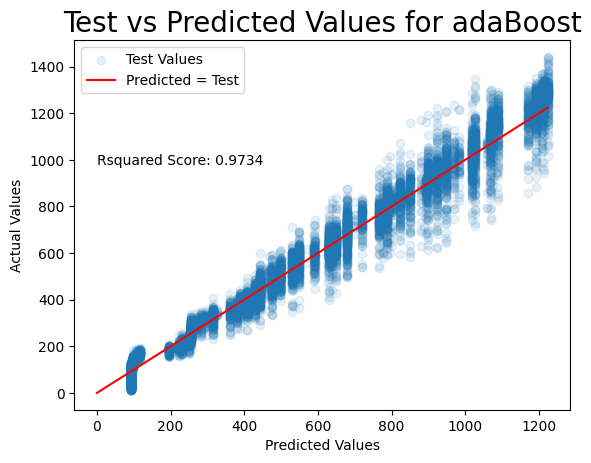

In [68]:
#Plot the actual vs predicted values for the adaBoost Model
model_adrf = joblib.load(os.path.join(model_path, 'adaboost_model.pkl'))
yhat_adrf = model_adrf.predict(X_tree_test)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'R^2: {r2_score(y_test, yhat_adrf)}')

#Determine the ideal line for the plot
x = np.linspace(0, max(yhat_adrf), 1000)
y = x

print(f'Rsquared Score: {r2_score(y_test, yhat_adrf)}')

plt.scatter(x = yhat_adrf, y = y_test, alpha = 0.1, label = 'Test Values')
plt.plot(x, y, color = 'red', label = 'Predicted = Test')
plt.title('Test vs Predicted Values for adaBoost', fontsize = 20)
plt.text(0,0.8*max(yhat_adrf), f'Rsquared Score: {round(r2_score(y_test, yhat_adrf),4)}', fontsize = 10)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.savefig('images/adaBoost_test_vs_predicted.png')
plt.show()

### <a id='toc1_5_4_'></a>[Gradient Boosting Regression](#toc0_)

For the gradient boosting regression, I started off with hyperparameter tuning to determine the best parameters for the model. I used the below code to determine the best parameters for the model. I then used the best parameters to run the model and print the summary. Note: Due to computing issues, I have the grid search broken up significantly to narrow in on the best parameters. The history and results are commented in the code.

#### <a id='toc1_5_4_1_'></a>[Hyper parameter tuning for the Gradient Boost Model](#toc0_)

In [62]:
## Use grid search cv to find the best parameters for a gradient boosting regressor
xgb = XGBRegressor(random_state = 42)
'''
parameter_grid = {'n_estimators':[10, 15],
                  'learning_rate':[0.3, 0.5, 0.7],
                  'max_depth':[None,25],
                  'subsample':[0.5,0.7,1.0],
                  'reg_alpha':[0.5,1.0,1.5],
                  'reg_lambda':[0.5,1.0,1.5],
                  'gamma':[0.5,1.0,1.5],
                  'min_child_weight':[0.5,1.0,1.5]}
#Best parameters: {'gamma': 1.5, 'learning_rate': 0.3, 'max_depth': 25, 'min_child_weight': 1.5, 'n_estimators': 15, 'reg_alpha': 1.5, 'reg_lambda': 1.5, 'subsample': 1.0}
#Best cross-validation score: 0.9878195763482076

parameter_grid = {'n_estimators':[15,20],
                  'learning_rate':[0.3],
                  'max_depth':[None,25,15],
                  'subsample':[1.0],
                  'reg_alpha':[1.5],
                  'reg_lambda':[1.5],
                  'gamma':[1.5],
                  'min_child_weight':[0.5,1.5]}
#Best parameters: {'gamma': 1.5, 'learning_rate': 0.3, 'max_depth': 25, 'min_child_weight': 1.5, 'n_estimators': 15, 'reg_alpha': 1.5, 'reg_lambda': 1.5, 'subsample': 1.0}
#Best cross-validation score: 0.9878195763482076

parameter_grid = {'n_estimators':[10,15],
                  'learning_rate':[0.2,0.3],
                  'max_depth':[None,25,35],
                  'subsample':[0.9,1.0],
                  'reg_alpha':[1.5],
                  'reg_lambda':[1.5],
                  'gamma':[1.5],
                  'min_child_weight':[0.5,1.5]}
Best parameters: {'gamma': 1.5, 'learning_rate': 0.3, 'max_depth': 25, 'min_child_weight': 1.5, 'n_estimators': 15, 'reg_alpha': 1.5, 'reg_lambda': 1.5, 'subsample': 1.0}
Best cross-validation score: 0.9878195763482076
'''
parameter_grid = {'n_estimators':[15],
                  'learning_rate':[0.3],
                  'max_depth':[25],
                  'subsample':[1.0],
                  'reg_alpha':[1.25, 1.5, 1.75],
                  'reg_lambda':[1.25, 1.5, 1.75],
                  'gamma':[1.25, 1.5, 1.75],
                  'min_child_weight':[1.5]}
#Best parameters: {'gamma': 1.25, 'learning_rate': 0.3, 'max_depth': 25, 'min_child_weight': 1.5, 'n_estimators': 15, 'reg_alpha': 1.5, 'reg_lambda': 1.5, 'subsample': 1.0}
#Best cross-validation score: 0.9878324286112157

grid_search = GridSearchCV(xgb, parameter_grid, cv = 5, n_jobs = -1, verbose = True)
grid_search.fit(X_tree_train, y_train)
model_xgb = grid_search.best_estimator_
joblib.dump(model_xgb, os.path.join(model_path, 'xgboost_model.pkl'))
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {(grid_search.best_score_)}')
print(f'Model train score {model_xgb.score(X_tree_train, y_train)}')
print(f'Model test score {model_xgb.score(X_tree_test, y_test)}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'gamma': 1.25, 'learning_rate': 0.3, 'max_depth': 25, 'min_child_weight': 1.5, 'n_estimators': 15, 'reg_alpha': 1.75, 'reg_lambda': 1.5, 'subsample': 1.0}
Best cross-validation score: 0.9877023981485994
Model train score 0.9963129067204253
Model test score 0.986910961768458


###### <a id='toc1_5_4_1_1_1_'></a>[Results](#toc0_)

As we can see above, a set of parameters that performed well was the following:
- n_estimators: 15
- learning_rate: 0.3
- max_depth: 25
- subsample: 1.0
- reg_alpha: 1.5
- reg_lambda: 1.5
- gamma: 1.25
- min_child_weight: 1.5
  

These parameters provided a test score of 0.9869 and a train score of 0.0.9963. This shows that the model is generalizing the data and not over-fitting. 

Best Parameters: {'gamma': 1.25, 'learning_rate': 0.3, 'max_depth': 25, 'min_child_weight': 1.5, 'n_estimators': 15, 'reg_alpha': 1.75, 'reg_lambda': 1.5, 'subsample': 1.0}
R^2: 0.986910961768458
Rsquared Score: 0.9869


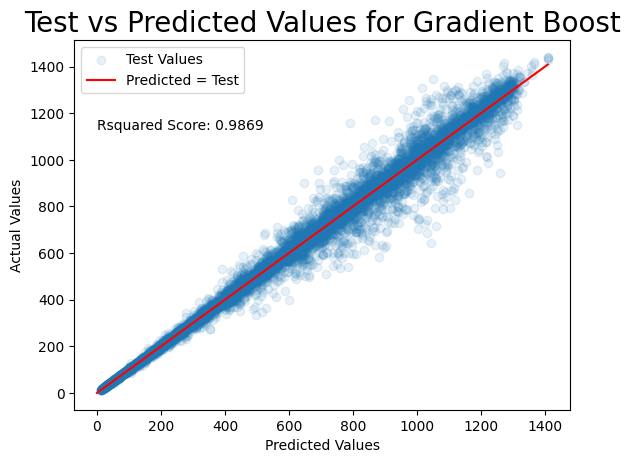

In [65]:
#Plot the actual vs predicted values for the Gradient Boost Model
model_xgb = joblib.load(os.path.join(model_path, 'xgboost_model.pkl'))
yhat_xgb = model_xgb.predict(X_tree_test)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'R^2: {r2_score(y_test, yhat_xgb)}')

#Determine the ideal line for the plot
x = np.linspace(0, max(yhat_xgb), 1000)
y = x

print(f'Rsquared Score: {round(r2_score(y_test, yhat_xgb),4)}')

plt.scatter(x = yhat_xgb, y = y_test, alpha = 0.1, label = 'Test Values')
plt.plot(x, y, color = 'red', label = 'Predicted = Test')
plt.title('Test vs Predicted Values for Gradient Boost', fontsize = 20)
plt.text(0,0.8*max(yhat_xgb), f'Rsquared Score: {round(r2_score(y_test, yhat_xgb),4)}', fontsize = 10)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.savefig('images/gradient_boost_test_vs_predicted.png')
plt.show()

## <a id='toc1_6_'></a>[Results and Analysis](#toc0_)

### <a id='toc1_6_1_'></a>[R^2 Scores for the different models](#toc0_)

As we can see in the below chart, the decision tree models performed the best compared to the linear/polynomial regression. In order to achieve this performance I did hyperparameter tuning to ensure that I didn't overfit the training data in addition to feature engineering of the timestamp data and removing the outliers.

Removing the outliers had the single greatest impact on all of the models. It is critical the proper amount of time is spent to understand the data and ensure that the data is clean. This will ensure that the model isn't attempting to learn on data that isn't representative of the goal of the model.

At the end of each model's section, I plotted the graph that shows the actual data vs the predicted data along with the perfect line. This is a great way to visualize the performance of the model and to understand if the residuals are randomly distributed around the perfect line. If the residuals are not randomly distributed around the perfect line, then the model is not performing well and the data needs to be further understood.

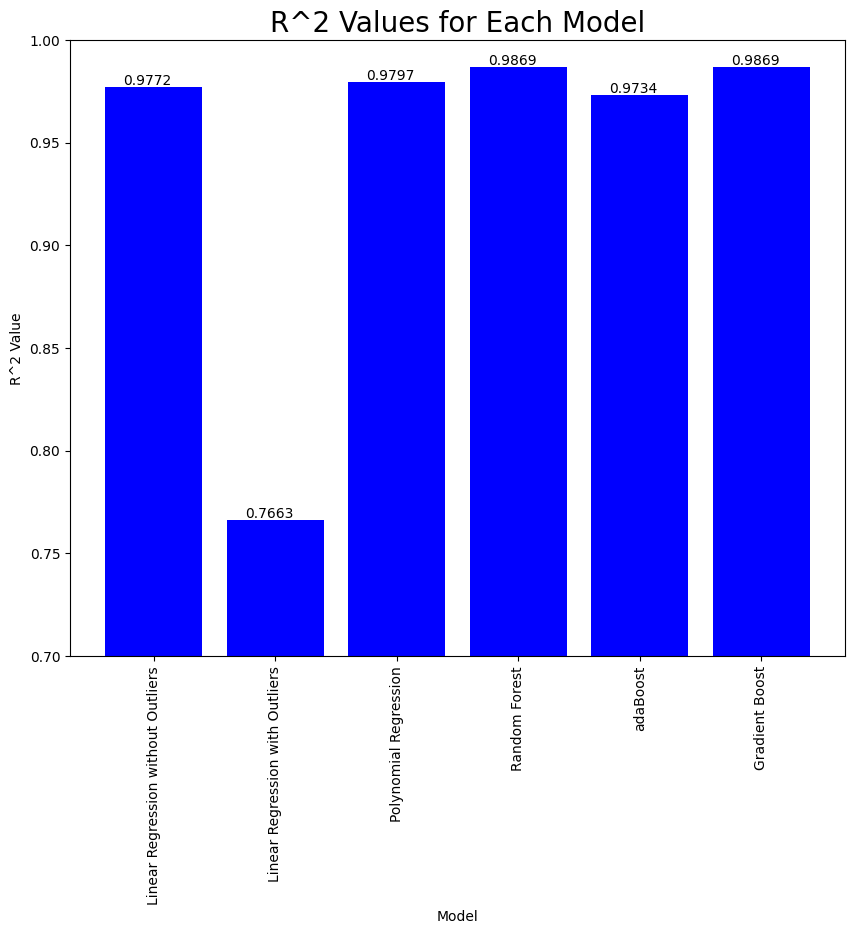

In [69]:
results_dict = {'Linear Regression without Outliers': r2_score(y_test, y_pred_ols),
                'Linear Regression with Outliers': r2_score(y_test_outliers, y_pred_outliers),
                'Polynomial Regression':r2_score(y_test, y_pred_poly),
                'Random Forest': r2_score(y_test, yhat_rf),
                'adaBoost': r2_score(y_test, yhat_adrf),
                'Gradient Boost': r2_score(y_test, yhat_xgb)}

#Create a bar chart
plt.figure(figsize = (10, 8))
plt.bar(results_dict.keys(), results_dict.values(), color = 'blue')
plt.title('R^2 Values for Each Model', fontsize = 20)

#Add the R^2 values to the chart
for i, v in enumerate(results_dict.values()):
    plt.text(i - 0.25, v + 0.001, str(round(v, 4)))

plt.ylim(0.7, 1)
plt.xticks(rotation = 90)
plt.xlabel('Model')
plt.ylabel('R^2 Value')
plt.show()

###### <a id='toc1_6_1_1_1_1_'></a>[Tie Breaker for Random Forest and Gradient Boost](#toc0_)

Since Random Forest and Gradient Boost both of the same score and ability to generalize on the test data, I will use the time to predict as the tie breaking score for my recommendation for a production model. The time to predict is significantly different between the two models; thus, I would recommend the gradient boost model be used for production environments.

In [75]:
%%timeit
#Time the gradient boost's prediction
yhat_xgb = model_xgb.predict(X_tree_test)

43.2 ms ± 5.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [76]:
%%timeit
#time the random forest's prediction
yhat_rf = model_rf.predict(X_tree_test)

1.59 s ± 65.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


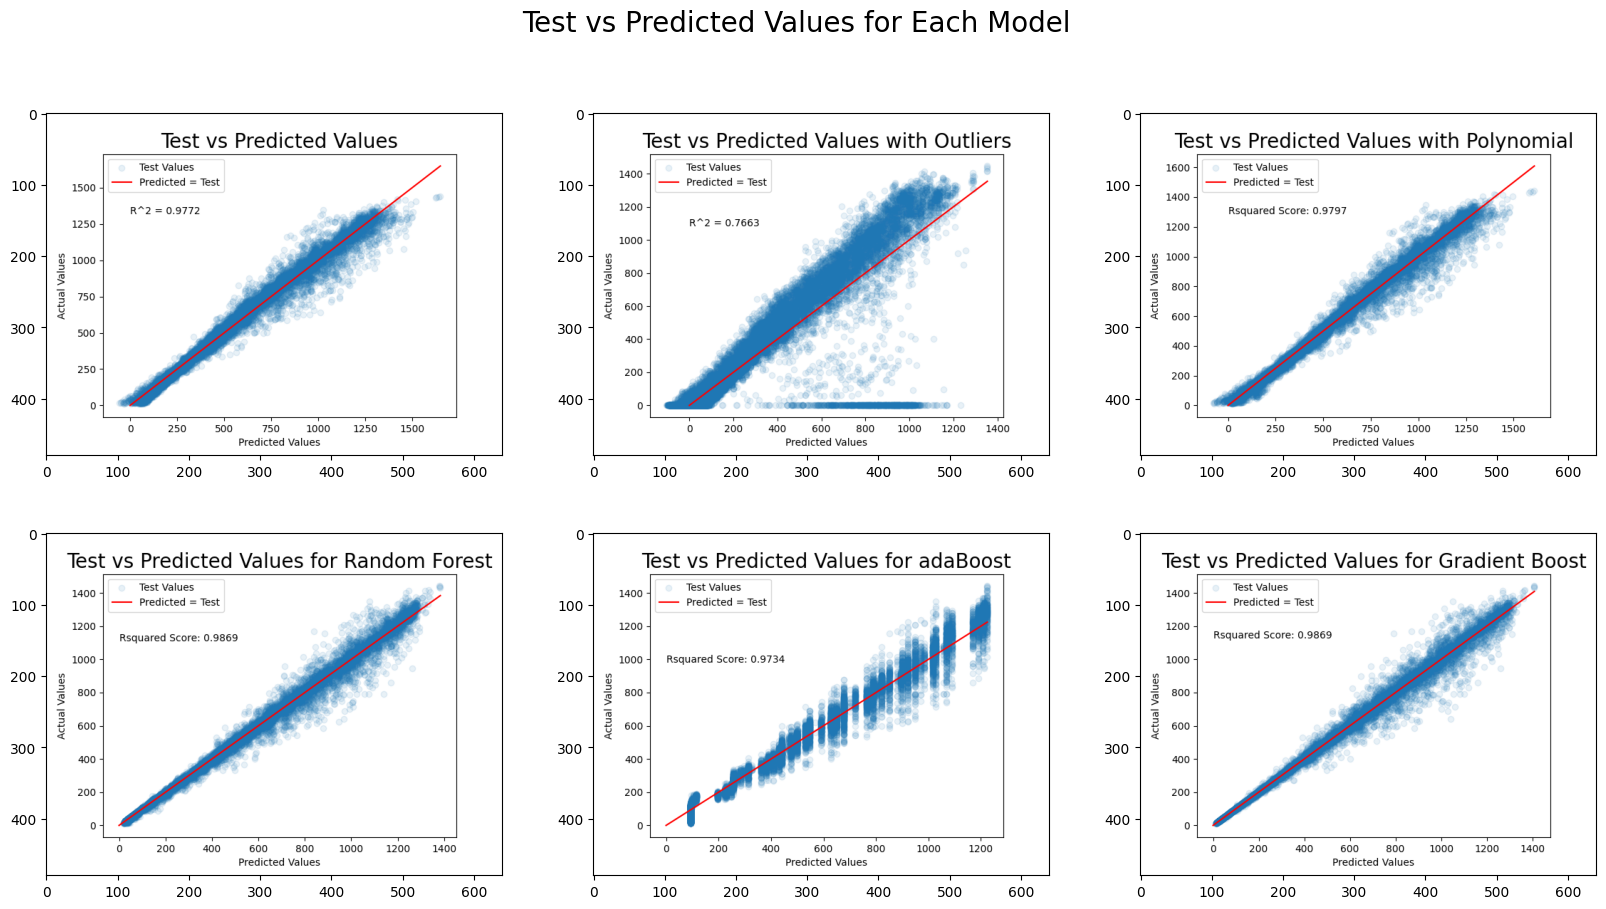

In [72]:
#Summary of the test vs predictions of each model

import matplotlib.image as mpimg

fig, axes = plt.subplots(2,3, figsize = (20, 10))
fig.suptitle('Test vs Predicted Values for Each Model', fontsize = 20)
axes[0,0].imshow(mpimg.imread('images/ols_test_vs_predicted.png'))
axes[0,1].imshow(mpimg.imread('images/ols_test_with_outliers_vs_predicted.png'))
axes[0,2].imshow(mpimg.imread('images/ols_test_with_feature_engineering_vs_predicted.png'))
axes[1,0].imshow(mpimg.imread('images/random_forest_test_vs_predicted.png'))
axes[1,1].imshow(mpimg.imread('images/adaboost_test_vs_predicted.png'))
axes[1,2].imshow(mpimg.imread('images/gradient_boost_test_vs_predicted.png'))
plt.show()

In the above plot, "Test vs Predicted Values for Each Model", we can see that most of the models performed similar to each other, with the exception of the model that included outliers and the adaBoost model. 

The model that included outliers had a significant amount of residuals that were not randomly distributed around the perfect line. This plot reinforces the information provided in the bar chart above that shows the r-squared scores for each model.

A notable observation with the adaBoost model is that the model is not able to predict to a fine enough granularity to predict the actual values. Although this isn't reducing the r-squared score as significantly as the outerliers impacted the score, it is still reducing the model's performance.

I would choose to use the gradient boost model over the other models because it does a good job of generlizing to the data, and when I timed the model's predict function, it was the fastest at 43ms and performed just as well as the random forest which had a prediction time of 1590 ms for the same dataset. 

## <a id='toc1_7_'></a>[Discussion and Conclusion](#toc0_)

The primary challenge and takeaway that I had from this project was the importance of understanding the data and ensuring that it was clean and representative of the goals. In this case, the goal was to predict power generation using weather data, and an auxiliary goal was to understand hardware deterioration. During the course of this project, I went through several attempts to remove the outliers from the data before I settled on the methodology that I presented in this report. 

Another challenge that I had throughout this project was keeping track of the features to ensure they were consistent through the training and testing data. This was primarily an issue using PolynomialFeatures because the output of that transform didn't include the original feature names. I was able to overcome this issue by transforming it back to a dataframe and reassigning the column names to the transformed feature names.

I think that the models that I created, primarily the decision tree models work well for their intended purpose. For future work, I would like to get more data since this dataset only included about a month worth of data in the middle of May-June. It would be interesting to see seasonality being applied to this data to account for the variation in the irradiation values. Overall, I think that the models that I created are a good starting point for predicting power generation and understanding hardware deterioration. 